# Olympics-analysis

## Import libraries


In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import tensorflow as tf
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Reading Datasets

### athletes_data

In [4]:
athletes_data = pd.read_csv('2025_Problem_C_Data\summerOly_athletes.csv')


athletes_data 


,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [5]:
athletes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    252565 non-null  object
 1   Sex     252565 non-null  object
 2   Team    252565 non-null  object
 3   NOC     252565 non-null  object
 4   Year    252565 non-null  int64 
 5   City    252565 non-null  object
 6   Sport   252565 non-null  object
 7   Event   252565 non-null  object
 8   Medal   252565 non-null  object
dtypes: int64(1), object(8)
memory usage: 17.3+ MB


In [6]:
athletes_data['Team'].value_counts()

Team
United States    16236
Great Britain    11390
France           11360
Italy             9185
Germany           8622
                 ...  
Formosa              1
Danzig               1
Salinero             1
Brynhild-2           1
Elvis Va             1
Name: count, Length: 1193, dtype: int64

In [7]:
athletes_data['Medal'].value_counts()

Medal
No medal    213747
Bronze       13070
Gold         13002
Silver       12746
Name: count, dtype: int64

### host_data

In [8]:
host_data = pd.read_csv('2025_Problem_C_Data\summerOly_hosts.csv')

host_data

,Year,Host
0,1896,"Athens, Greece"
1,1900,"Paris, France"
2,1904,"St. Louis, United States"
3,1908,"London, United Kingdom"
4,1912,"Stockholm, Sweden"
5,1916,Cancelled (WWI – Berlin had been awarded)
6,1920,"Antwerp, Belgium"
7,1924,"Paris, France"
8,1928,"Amsterdam, Netherlands"
9,1932,"Los Angeles, United States"


### medal_data

In [9]:
medal_data = pd.read_csv('2025_Problem_C_Data\summerOly_medal_counts.csv')

medal_data


,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896
...,...,...,...,...,...,...,...
1430,84,Qatar,0,0,1,1,2024
1431,84,Refugee Olympic Team,0,0,1,1,2024
1432,84,Singapore,0,0,1,1,2024
1433,84,Slovakia,0,0,1,1,2024


In [10]:
medal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    1435 non-null   int64 
 1   NOC     1435 non-null   object
 2   Gold    1435 non-null   int64 
 3   Silver  1435 non-null   int64 
 4   Bronze  1435 non-null   int64 
 5   Total   1435 non-null   int64 
 6   Year    1435 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 78.6+ KB


### programs_data

In [11]:
programs_data= pd.read_csv('2025_Problem_C_Data\summerOly_programs.csv', encoding='latin1')

programs_data


,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Skating,Figure,FSK,ISU,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Ice Hockey,Ice Hockey,IHO,IIHF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,237,257,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0
72,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,31,34,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0


## Exploratory Data Analysis

### atheletes.csv data explore


In [12]:
athletes_data

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [13]:
print(athletes_data["Medal"].unique())

print(athletes_data["Sport"].unique())

print(athletes_data["Team"].unique())


['No medal' 'Gold' 'Bronze' 'Silver']
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics' 'Cycling Road'
 'Artistic Gymnastics' 'Karate' 'Baseball/Softball'
 'Trampoline Gymnastics' 'Marathon Swimming' 'Canoe Slalom' 'Surfing'
 'Canoe Sprint' 'Cycling BMX Racing' 'Equestrian' 'Artistic Swimming'
 'Cycling Track' 'Skateboarding' 'Cycling Mountain Bike' '3x3 Basketball'
 'Cycling BMX Freestyle

In [14]:
# 性别分析

gender_unique_values = athletes_data.Sex.value_counts()
gender_unique_values

Sex
M    178544
F     74021
Name: count, dtype: int64

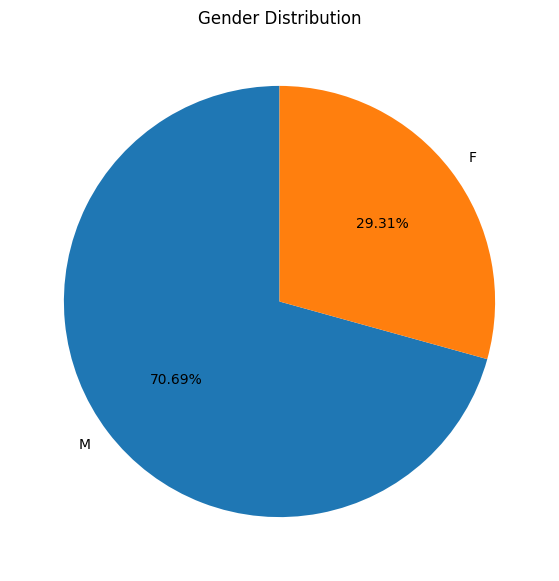

In [15]:
plt.figure(figsize=(15,7))
plt.title("Gender Distribution")
plt.pie(gender_unique_values, labels=gender_unique_values.index, autopct="%.2f%%", startangle=90)
plt.show()

In [16]:
# 国家参加人数分析
participants_counts  = athletes_data['NOC'].value_counts()

participants_counts

NOC
USA    16774
GBR    11998
FRA    11972
ITA     9351
GER     8866
       ...  
CRT       11
YMD        5
NBO        2
UNK        2
NFL        1
Name: count, Length: 234, dtype: int64

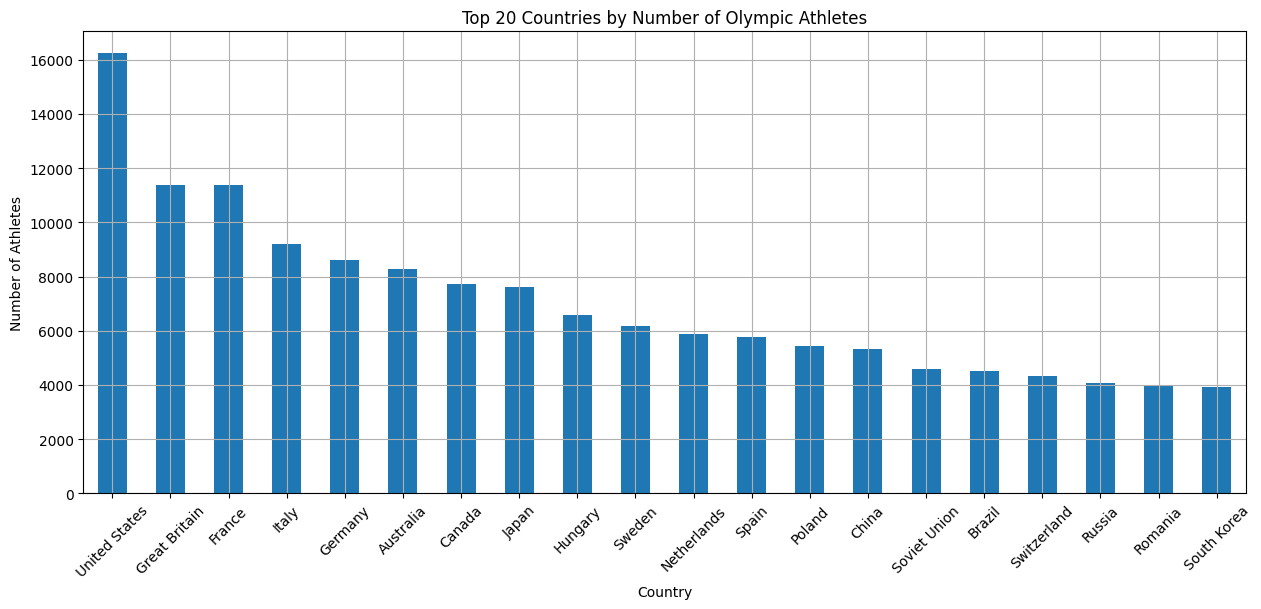

In [17]:
#国家历史参赛人数排名
plt.figure(figsize=(15, 6))
athletes_data['Team'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Countries by Number of Olympic Athletes')
plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

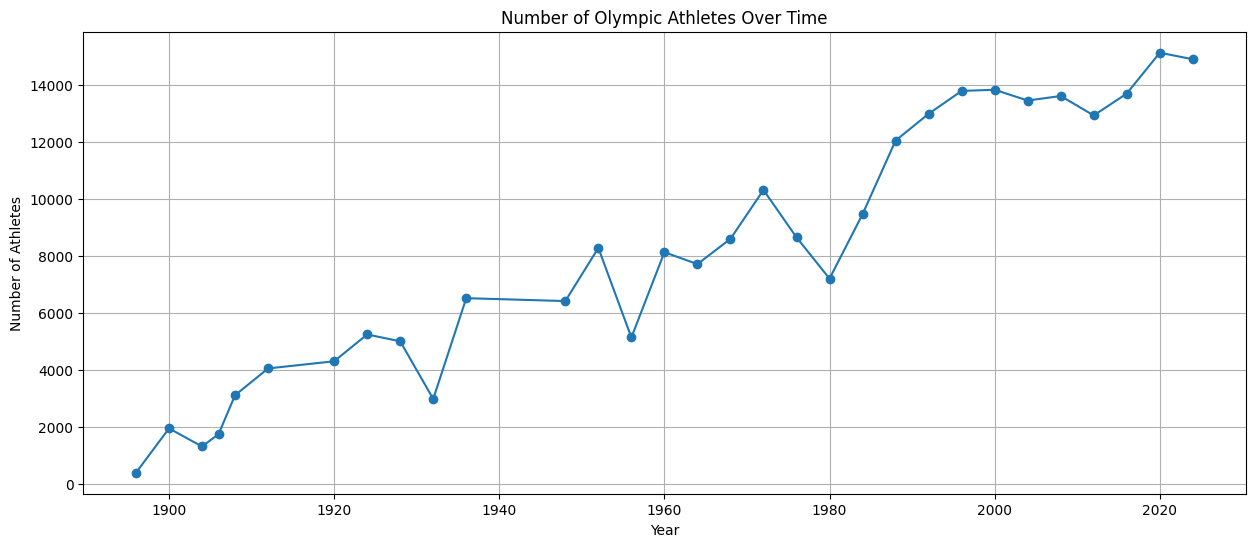

In [18]:
#国家历年参赛人数排名
yearly_counts = athletes_data['Year'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('Number of Olympic Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.show()

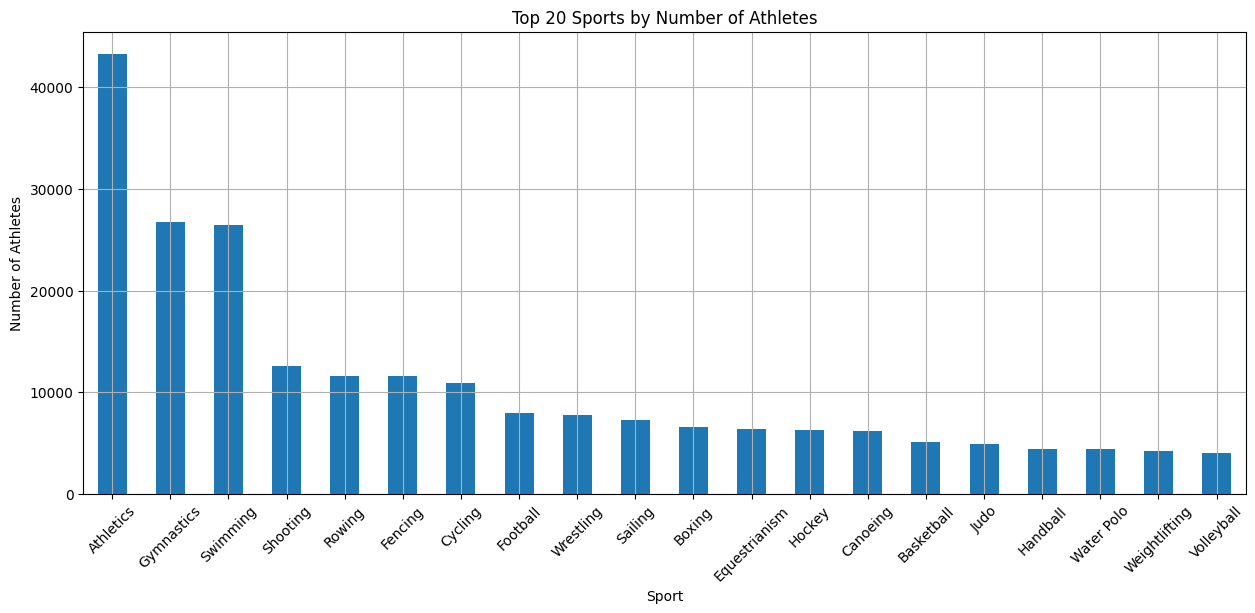

In [19]:
#项目参与人数排名
plt.figure(figsize=(15, 6))
athletes_data['Sport'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Sports by Number of Athletes')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

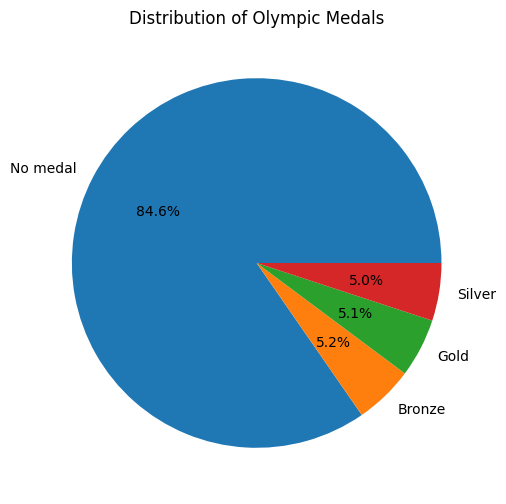

In [20]:
#获奖情况分析
plt.figure(figsize=(10, 6))
medal_dist = athletes_data['Medal'].value_counts()
plt.pie(medal_dist, labels=medal_dist.index, autopct='%1.1f%%')
plt.title('Distribution of Olympic Medals')
plt.show()

### medal_data data explore 

In [21]:
medal_data.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896


In [22]:
#添加奖牌和金牌百分比特征
# 1.计算每一年的金牌和奖牌总数
yearly_medals = medal_data.groupby('Year').agg({
    'Gold': 'sum',
    'Total': 'sum'
}).reset_index()

# 2. 将这些总数合并回原始数据框
medal_data = medal_data.merge(yearly_medals, on='Year', suffixes=('', '_total'))

# 3. 计算占比并添加新列
medal_data['Gold_Percentage'] = (medal_data['Gold'] / medal_data['Gold_total'] * 100).round(2)
medal_data['Total_Percentage'] = (medal_data['Total'] / medal_data['Total_total'] * 100).round(2)

# 4. 重命名列以避免混淆
medal_data = medal_data.rename(columns={
    'Gold_total': 'Year_Gold_Total',
    'Total_total': 'Year_Total_Medals'
})


In [23]:
#添加主办国特征


# 清理host数据
# 移除取消的奥运会
host_data = host_data[~host_data['Host'].str.contains('Cancelled', na=False)]

# 从Host列中提取国家名称
host_data['Host_Country'] = host_data['Host'].str.extract(r',\s*([^(]+)')
host_data['Host_Country'] = host_data['Host_Country'].str.strip()

# 处理一些特殊情况
host_data['Host_Country'] = host_data['Host_Country'].replace({
    'United Kingdom': 'Great Britain',
    'Soviet Union': 'Soviet Union',
    'West Germany': 'Germany'
})

# 2. 创建is_host列
medal_data['is_host'] = 0

# 3. 对每个主办年份和国家进行匹配
for _, host_row in host_data.iterrows():
    year = host_row['Year']
    country = host_row['Host_Country']
    # 设置对应的主办国标记为1
    mask = (medal_data['Year'] == year) & (medal_data['NOC'] == country)
    medal_data.loc[mask, 'is_host'] = 1



C:\Users\14479\AppData\Local\Temp\ipykernel_28536\260829327.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_data['Host_Country'] = host_data['Host'].str.extract(r',\s*([^(]+)')
C:\Users\14479\AppData\Local\Temp\ipykernel_28536\260829327.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_data['Host_Country'] = host_data['Host_Country'].str.strip()
C:\Users\14479\AppData\Local\Temp\ipykernel_28536\260829327.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [24]:
medal_data

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Year_Gold_Total,Year_Total_Medals,Gold_Percentage,Total_Percentage,is_host
0,1,United States,11,7,2,20,1896,43,122,25.58,16.39,0
1,2,Greece,10,18,19,47,1896,43,122,23.26,38.52,1
2,3,Germany,6,5,2,13,1896,43,122,13.95,10.66,0
3,4,France,5,4,2,11,1896,43,122,11.63,9.02,0
4,5,Great Britain,2,3,2,7,1896,43,122,4.65,5.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,84,Qatar,0,0,1,1,2024,328,1039,0.00,0.10,0
1431,84,Refugee Olympic Team,0,0,1,1,2024,328,1039,0.00,0.10,0
1432,84,Singapore,0,0,1,1,2024,328,1039,0.00,0.10,0
1433,84,Slovakia,0,0,1,1,2024,328,1039,0.00,0.10,0


C:\Users\14479\AppData\Local\Temp\ipykernel_28536\3606228553.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


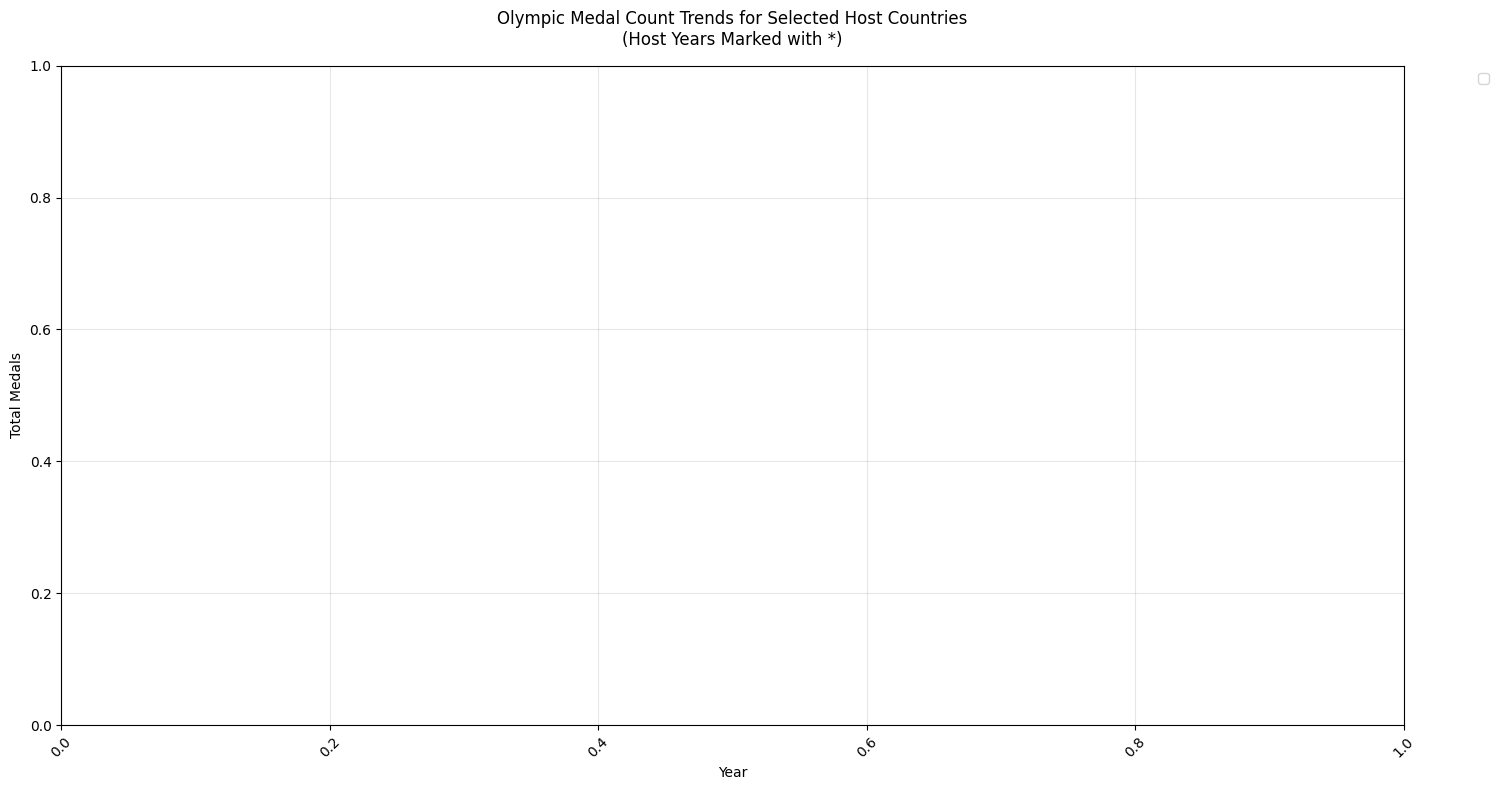

In [25]:
# 选择要分析的国家
selected_countries = []

# 创建图表
plt.figure(figsize=(15, 8))

# 为每个国家绘制折线
for country in selected_countries:
    # 获取该国家的数据
    country_data = medal_data[medal_data['NOC'] == country]
    
    # 绘制总奖牌数的变化
    plt.plot(country_data['Year'], country_data['Total_Percentage'], 
            label=country, marker='o', linestyle='-', alpha=0.7)
    
    # 特别标注主办年份的点
    host_years = country_data[country_data['is_host'] == 1]
    if not host_years.empty:
        plt.scatter(host_years['Year'], host_years['Total_Percentage'], 
                   s=150, marker='*', color='red',
                   label=f'{country} (Host Years)')

# 设置图表属性
plt.title('Olympic Medal Count Trends for Selected Host Countries\n(Host Years Marked with *)', 
         fontsize=12, pad=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Medals', fontsize=10)
plt.grid(True, alpha=0.3)

# 添加图例
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 旋转x轴标签
plt.xticks(rotation=45)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

### programs_data data explore

In [26]:
programs_data

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Skating,Figure,FSK,ISU,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Ice Hockey,Ice Hockey,IHO,IIHF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,237,257,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0
72,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,31,34,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0


In [27]:
# 获取年份列
year_columns = [col for col in programs_data.columns if str(col).isdigit()]

#确保年份列为数值类型
for col in year_columns:
    programs_data[col] = pd.to_numeric(programs_data[col].replace('•', '0'), errors='coerce').fillna(0)

#  按Sport分组计算每年的项目数量
sport_evolution = programs_data.groupby('Sport')[year_columns].sum()

#  添加sum列
sport_evolution['sum'] = sport_evolution[year_columns].astype(float).sum(axis=1)




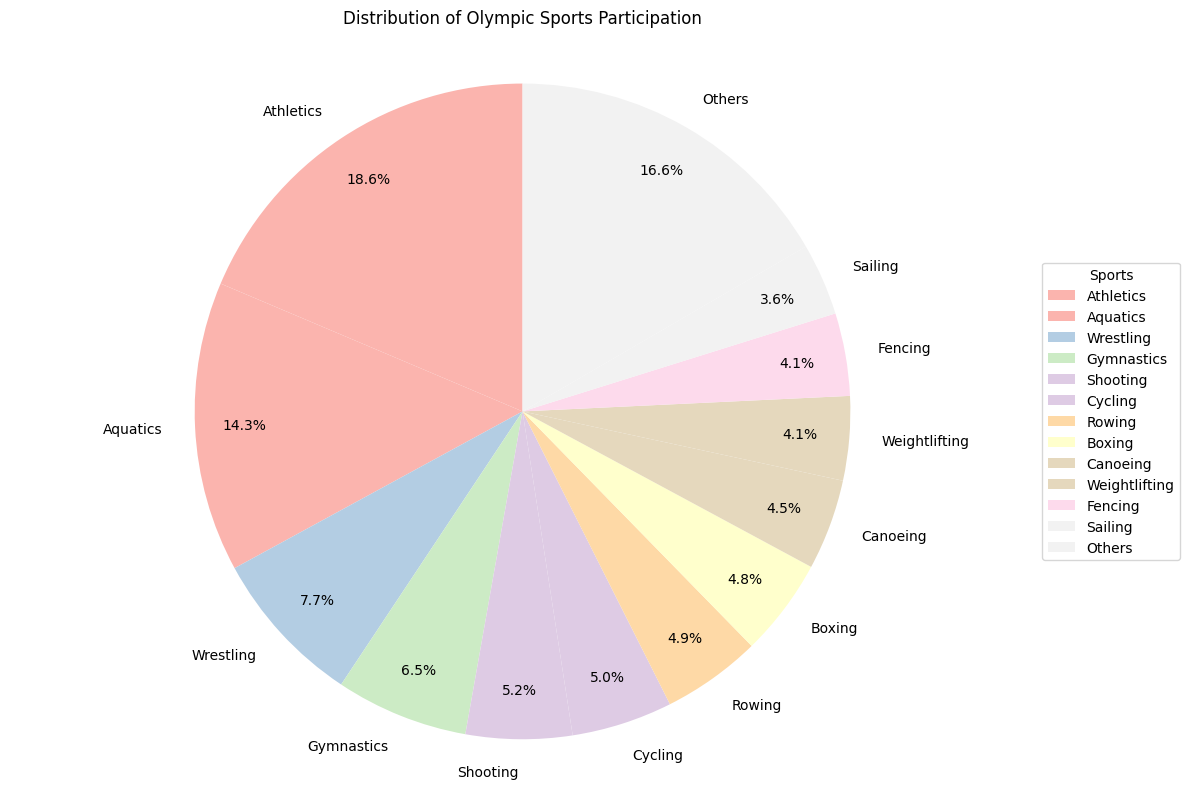


Detailed Statistics:
Number of major sports shown: 12
Number of sports in 'Others' category: 36

Sports in 'Others' category:
['Judo', 'Equestrian', 'Tennis', 'Archery', 'Taekwondo', 'Volleyball', 'Modern Pentathlon', 'Badminton', 'Table Tennis', 'Basketball', 'Field hockey', 'Football', 'Handball', 'Triathlon', 'Baseball\xa0and Softball', 'Golf', 'Rugby', 'Skateboarding', 'Karate', 'Skating', 'Sport Climbing', 'Tug of War', 'Polo', 'Surfing', 'Water Motorsports', 'Croquet', 'Breaking', 'Rackets', 'Lacrosse', 'Basque Pelota', 'Cricket', 'Ice Hockey', 'Jeu de Paume', 'Roque', 'Flag football', 'Squash']


In [28]:
# 删除汇总行
sport_evolution = sport_evolution[~sport_evolution.index.isin(['Total disciplines', 'Total events', 'Total sports'])]

# 按sum值排序
sorted_sports = sport_evolution.sort_values('sum', ascending=False)

# 设置阈值（这里以前25%的项目为例，你可以调整这个阈值）
threshold = sorted_sports['sum'].quantile(0.75)

# 分类
major_sports = sorted_sports[sorted_sports['sum'] >= threshold]
other_sports = sorted_sports[sorted_sports['sum'] < threshold]

# 准备饼图数据
sizes = list(major_sports['sum']) + [other_sports['sum'].sum()]
labels = list(major_sports.index) + ['Others']

# 创建饼图
plt.figure(figsize=(12, 8))
colors = plt.cm.Pastel1(np.linspace(0, 1, len(sizes)))  # 使用颜色映射生成颜色

plt.pie(sizes, 
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',  # 显示百分比
        pctdistance=0.85,   # 百分比标签的位置
        startangle=90)      # 起始角度

plt.title('Distribution of Olympic Sports Participation', pad=20)
plt.axis('equal')

# 添加图例
plt.legend(labels, 
          loc="center left", 
          bbox_to_anchor=(1, 0.5),
          title="Sports")

plt.tight_layout()
plt.show()

# 打印统计信息
print(f"\nDetailed Statistics:")
print(f"Number of major sports shown: {len(major_sports)}")
print(f"Number of sports in 'Others' category: {len(other_sports)}")
print("\nSports in 'Others' category:")
print(other_sports.index.tolist())

## Data Cleaning

### athletes_data

In [29]:
athletes_data

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [30]:
# 检查缺失值

athletes_data.isnull().sum()

Name     0
Sex      0
Team     0
NOC      0
Year     0
City     0
Sport    0
Event    0
Medal    0
dtype: int64

In [31]:
# 检查 noc 和 team 是否是一一对应

athletes_data.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts()

NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
      ... 
KOS      1
LES      1
ROC      1
LBN      1
AIN      1
Name: count, Length: 234, dtype: int64

我们这里发现 Noc 和 team 并不是一一对应的，这意味着一个Noc代码可能会对应多个队伍，对此我们决定建立国家和Noc之间的映射表

映射表数据来源 :(https://www.kaggle.com/code/chadalee/olympics-data-cleaning-exploration-prediction/input?select=noc_regions.csv)

In [32]:
# Lets read in the noc_country mapping first
noc_country = pd.read_csv('additional_data/noc_regions.csv')
noc_country.drop('notes', axis = 1 , inplace = True)
noc_country.rename(columns = {'region':'Country'}, inplace = True)

noc_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [33]:
# merging
athletes_data = athletes_data.merge(noc_country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')


In [34]:
athletes_data

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal,Country
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal,China
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal,China
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal,Denmark
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,Netherlands
...,...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal,Equatorial Guinea
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal,Italy
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold,Netherlands
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze,France


In [35]:
# Do we have NOCs that didnt have a matching country in the master?
athletes_data.loc[athletes_data['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
509,SGP,Singapore
5523,ROT,Refugee Olympic Athletes
37154,SGP,June Climene
51268,UNK,Unknown
54091,TUV,Tuvalu
67495,SGP,Rika II
89655,SGP,Singapore-2
193502,SGP,Singapore-1
222634,ROC,Russia
222809,EOR,Refugee Olympic Team


我们通过查看他们的team信息可以手动为他们添加国家信息

我们发现有一些的noc是存在标记错误的: 对应Russia的应该是RUS 对应Lebanon的应该是 LIB 对这些数据我们对他们的noc代码进行手动修改

同时存在一些特殊代码，如AIN 表示的是独立艺术家 如EOR表示的是难民奥林匹克队

In [36]:
athletes_data['Country'] = np.where(athletes_data['NOC']=='SGP', 'Singapore', athletes_data['Country'])
athletes_data['Country'] = np.where(athletes_data['NOC']=='ROT', 'Refugee Olympic Athletes', athletes_data['Country'])
athletes_data['Country'] = np.where(athletes_data['NOC']=='UNK', 'Unknown', athletes_data['Country'])
athletes_data['Country'] = np.where(athletes_data['NOC']=='TUV', 'Tuvalu', athletes_data['Country'])
athletes_data['Country'] = np.where(athletes_data['NOC']=='AIN', 'AIN', athletes_data['Country'])
athletes_data['Country'] = np.where(athletes_data['NOC']=='EOR', 'EOR', athletes_data['Country'])



In [37]:
athletes_data['NOC'] = athletes_data['NOC'].replace({
    'ROC': 'RUS',
    'LBN': 'LIB'
})


现在经过处理之后，已经完成了从noc到地区的映射

In [38]:
#删除关于冰雪的项目
# Remove ice sports and athletes playing ice sports
ice_sports = ['Figure Skating', 'Ice Hockey']
athletes_data = athletes_data[~athletes_data['Sport'].isin(ice_sports)]# 删除不属于夏季奥运会的项目

In [39]:
# 让 country 取代team ，删除team和city特征栏
athletes_data = athletes_data.drop(['Team', 'City'], axis=1)


In [40]:
#编码处理
#对sex编码
athletes_data['Sex'] = athletes_data['Sex'].map({'M': 1, 'F': 0})

#对奖牌编码
athletes_data['is_gold'] = (athletes_data['Medal'] == 'Gold').astype(int)
athletes_data['is_silver'] = (athletes_data['Medal'] == 'Silver').astype(int)
athletes_data['is_bronze'] = (athletes_data['Medal'] == 'Bronze').astype(int)

#  创建is_medal特征
athletes_data['is_medal'] = ((athletes_data['is_gold'] + 
                             athletes_data['is_silver'] + 
                             athletes_data['is_bronze']) > 0).astype(int)



In [41]:
athletes_data.to_csv('athletes_data.csv',index = False)

In [42]:
#删除medal特征
athletes_data = athletes_data.drop(['Medal'], axis=1)

In [43]:
athletes_data

,Name,Sex,NOC,Year,Sport,Event,Country,is_gold,is_silver,is_bronze,is_medal
0,A Dijiang,1,CHN,1992,Basketball,Basketball Men's Basketball,China,0,0,0,0
1,A Lamusi,1,CHN,2012,Judo,Judo Men's Extra-Lightweight,China,0,0,0,0
2,Gunnar Aaby,1,DEN,1920,Football,Football Men's Football,Denmark,0,0,0,0
3,Edgar Aabye,1,DEN,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Denmark,1,0,0,1
4,Cornelia (-strannood),0,NED,1932,Athletics,Athletics Women's 100 metres,Netherlands,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,0,GEQ,2024,Athletics,Women's 100m,Equatorial Guinea,0,0,0,0
252561,Emanuela Liuzzi,0,ITA,2024,Wrestling,Women's Freestyle 50kg,Italy,0,0,0,0
252562,Isayah Boers,1,NED,2024,Athletics,4 x 400m Relay Mixed,Netherlands,1,0,0,1
252563,Kevin Staut,1,FRA,2024,Equestrian,Jumping Team,France,0,0,1,1


我们发现对于团队项目，团队中的每个运动员都会被记录获奖情况，所以简单的对is_medal进行求和这样求出的金牌总数会给我们一个错误的奖牌统计，所以我们得先找到哪些项目是团队项目：

加入一支队伍在一届奥运会上赢得了一个项目的多个金牌，那么这个项目就是团队项目

思路来源：(https://www.kaggle.com/code/chadalee/olympics-data-cleaning-exploration-prediction)

In [44]:
# 使用已有的is_gold, is_silver, is_bronze列进行聚合
identify_team_events = athletes_data.groupby(
    ['Country', 'Year', 'Sport', 'Event']
).agg({
    'is_gold': 'sum',
    'is_silver': 'sum',
    'is_bronze': 'sum'
}).reset_index()

# 重命名列
identify_team_events = identify_team_events.rename(columns={
    'is_gold': 'Gold',
    'is_silver': 'Silver',
    'is_bronze': 'Bronze'
})

In [45]:
identify_team_events.to_csv('identify_team_events.csv',index = False)

In [46]:
team_events = identify_team_events[identify_team_events['Gold'] > 1].copy()

team_events = team_events['Event'].unique()

len(team_events)

324

In [47]:
# 添加一个特征用于表明是否是团队项目
identify_team_events['is_team'] = identify_team_events['Event'].isin(team_events).astype(int)

identify_team_events



,Country,Year,Sport,Event,Gold,Silver,Bronze,is_team
0,AIN,2024,Canoe Sprint,Men's Canoe Double 500m,0,0,0,1
1,AIN,2024,Canoe Sprint,Men's Canoe Single 1000m,0,0,0,0
2,AIN,2024,Canoe Sprint,Men's Kayak Single 1000m,0,0,0,0
3,AIN,2024,Canoe Sprint,Women's Canoe Single 200m,0,0,0,0
4,AIN,2024,Cycling Road,Men's Individual Time Trial,0,0,0,0
...,...,...,...,...,...,...,...,...
111275,Zimbabwe,2024,Athletics,Men's Marathon,0,0,0,0
111276,Zimbabwe,2024,Athletics,Women's Marathon,0,0,0,0
111277,Zimbabwe,2024,Rowing,Men's Single Sculls,0,0,0,0
111278,Zimbabwe,2024,Swimming,Men's 200m Backstroke,0,0,0,0


经过检查，我们发现有一些项目不属于团队项目但是仍然出现了一个项目的金牌被多个人获得的情况：
经调查，我们发现这是因为有并列金牌的现象出现，我们对这些情况进行筛查和处理

In [48]:
remove_events = ["Swimming Women's 100 metres Freestyle"]

team_events= list(set(team_events) - set(remove_events))

len(team_events)

323

In [49]:
identify_team_events

,Country,Year,Sport,Event,Gold,Silver,Bronze,is_team
0,AIN,2024,Canoe Sprint,Men's Canoe Double 500m,0,0,0,1
1,AIN,2024,Canoe Sprint,Men's Canoe Single 1000m,0,0,0,0
2,AIN,2024,Canoe Sprint,Men's Kayak Single 1000m,0,0,0,0
3,AIN,2024,Canoe Sprint,Women's Canoe Single 200m,0,0,0,0
4,AIN,2024,Cycling Road,Men's Individual Time Trial,0,0,0,0
...,...,...,...,...,...,...,...,...
111275,Zimbabwe,2024,Athletics,Men's Marathon,0,0,0,0
111276,Zimbabwe,2024,Athletics,Women's Marathon,0,0,0,0
111277,Zimbabwe,2024,Rowing,Men's Single Sculls,0,0,0,0
111278,Zimbabwe,2024,Swimming,Men's 200m Backstroke,0,0,0,0


In [50]:
def identify_team_event(df):
    """
    识别团队项目并调整奖牌计数
    """
    df = df.copy()
    
    # 调整团队项目的奖牌计数
    team_events = df[df['is_team'] == 1].copy()
    for medal_type in ['Gold', 'Silver', 'Bronze']:
        # 如果奖牌数不为0，则设置为1
        team_events.loc[team_events[medal_type] > 0, medal_type] = 1
    
    # 更新原始数据框中的团队项目数据
    df.update(team_events)
    
    return df

# 应用函数
identify_team_events = identify_team_event(identify_team_events)


In [51]:
# 建立一个总奖牌数特征

identify_team_events['Total_medal'] = identify_team_events['Gold'] + identify_team_events['Silver'] + identify_team_events['Bronze'] 

In [52]:
identify_team_events.to_csv('identify_team_events.csv',index = False)

## Feature enginering

### 有关运动员实力的特征构建

我们希望以上面的作为基准处理总结的信息

首先想要向上面添加每个项目在该年份参赛的运动员实力特征 ： 构建特征的方向往下面这几个方向去构建

运动员规模，性别比例，运动项目分布情况，奖牌效率（每名运动员平均获得的奖牌数），当前项目明星运动员数量

In [53]:
# 从athletes_data中获取数据并实现对每个项目运动员数量的统计

athlete_counts = athletes_data.groupby(['Country', 'Year', 'Sport', 'Event']).size().reset_index(name='athlete_count')

# 2. 将运动员数量信息合并到identify_team_events
identify_team_events = pd.merge(
    identify_team_events,
    athlete_counts,
    on=['Country', 'Year', 'Sport', 'Event'],
    how='left'
)



In [54]:
# 分别统计他们的男女运动员人数

# 1. 分别计算男女运动员数量
gender_counts = athletes_data.groupby(['Country', 'Year', 'Sport', 'Event', 'Sex']).size().unstack(fill_value=0)
gender_counts.columns = ['female_count', 'male_count']  # 因为Sex已经编码为0(F)和1(M)
gender_counts = gender_counts.reset_index()

# 2. 将性别统计信息合并到event_summary
identify_team_events  = pd.merge(
    identify_team_events ,
    gender_counts,
    on=['Country', 'Year', 'Sport', 'Event'],
    how='left'
)

In [55]:
identify_team_events

,Country,Year,Sport,Event,Gold,Silver,Bronze,is_team,Total_medal,athlete_count,female_count,male_count
0,AIN,2024,Canoe Sprint,Men's Canoe Double 500m,0,0,0,1,0,2,0,2
1,AIN,2024,Canoe Sprint,Men's Canoe Single 1000m,0,0,0,0,0,1,0,1
2,AIN,2024,Canoe Sprint,Men's Kayak Single 1000m,0,0,0,0,0,1,0,1
3,AIN,2024,Canoe Sprint,Women's Canoe Single 200m,0,0,0,0,0,2,2,0
4,AIN,2024,Cycling Road,Men's Individual Time Trial,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
111275,Zimbabwe,2024,Athletics,Men's Marathon,0,0,0,0,0,1,0,1
111276,Zimbabwe,2024,Athletics,Women's Marathon,0,0,0,0,0,1,1,0
111277,Zimbabwe,2024,Rowing,Men's Single Sculls,0,0,0,0,0,1,0,1
111278,Zimbabwe,2024,Swimming,Men's 200m Backstroke,0,0,0,0,0,1,0,1


In [56]:
identify_team_events.to_csv('identify_team_events.csv', index=False)

In [57]:
# 统计每一届奥运会中每个sport中event的数量
sport_event_counts = identify_team_events.groupby(['Sport','Year'])['Event'].nunique().reset_index()
sport_event_counts = sport_event_counts.rename(columns={'Event': 'event_count'})

sport_event_counts = sport_event_counts.sort_values('event_count', ascending=False)
sport_event_counts

,Sport,Year,event_count
64,Athletics,2020,53
65,Athletics,2024,48
63,Athletics,2016,47
62,Athletics,2012,47
61,Athletics,2008,47
...,...,...,...
82,Basketball,1948,1
83,Basketball,1952,1
84,Basketball,1956,1
85,Basketball,1960,1


In [58]:
# 1. 只选择团队项目
team_events = identify_team_events[identify_team_events['is_team'] == 1]

# 2. 按Year和Sport分组统计团队项目数量
team_events_count = team_events.groupby(['Year', 'Sport'])['Event'].nunique().reset_index()
team_events_count = team_events_count.rename(columns={'Event': 'team_events_count'})

team_events_count


   

,Year,Sport,team_events_count
0,1896,Athletics,1
1,1896,Gymnastics,5
2,1896,Tennis,1
3,1900,Athletics,2
4,1900,Basque Pelota,1
...,...,...,...
544,2024,Table Tennis,3
545,2024,Tennis,3
546,2024,Trampoline Gymnastics,2
547,2024,Volleyball,2


In [59]:
# 统计每一届奥运会中每个sport中event的数量,同时还列出了团队项目和个人项目

sport_event_counts = pd.merge(
    sport_event_counts,
    team_events_count,
    on=['Year', 'Sport'],
    how='left'
)

#处理缺失值并计算单人项目数量
sport_event_counts['team_events_count'] = sport_event_counts['team_events_count'].fillna(0)
sport_event_counts['single_event_count'] = sport_event_counts['event_count'] - sport_event_counts['team_events_count']



In [60]:
sport_event_counts

,Sport,Year,event_count,team_events_count,single_event_count
0,Athletics,2020,53,10.0,43.0
1,Athletics,2024,48,6.0,42.0
2,Athletics,2016,47,5.0,42.0
3,Athletics,2012,47,5.0,42.0
4,Athletics,2008,47,5.0,42.0
...,...,...,...,...,...
760,Basketball,1948,1,1.0,0.0
761,Basketball,1952,1,1.0,0.0
762,Basketball,1956,1,1.0,0.0
763,Basketball,1960,1,1.0,0.0


In [61]:
# 按照原始代码的方式进行聚合
country_year_sport_summary = identify_team_events.groupby(
    ['Country', 'Year', 'Sport']
).agg({
    'Gold': 'sum',
    'Silver': 'sum',
    'Bronze': 'sum',
    'Total_medal': 'sum',
    'athlete_count': 'sum',
    'female_count': 'sum',
    'male_count': 'sum',
    'is_team': 'sum',  # 统计这个国家参加团队项目的数量
}).reset_index()

# 重命名列
country_year_sport_summary = country_year_sport_summary.rename(
    columns={'is_team': 'participated_team_events_count'}
)

In [62]:
# 对上面数据按照Country(NOC)、Year、Sport 进行聚合

country_year_sport_summary = identify_team_events.groupby(['Country', 'Year', 'Sport']).agg({
    'Gold': 'sum',
    'Silver': 'sum',
    'Bronze': 'sum',
    'Total_medal': 'sum',
    'athlete_count': 'sum',
    'female_count': 'sum',
    'male_count': 'sum',
    'is_team': 'sum',  #这里用于统计这个国家参加团队项目的数量
}).reset_index()


country_year_sport_summary =  country_year_sport_summary.rename(columns={'is_team': 'participated_team_events_count'})

country_year_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,athlete_count,female_count,male_count,participated_team_events_count
0,AIN,2024,Canoe Sprint,0,0,0,0,6,2,4,1
1,AIN,2024,Cycling Road,0,0,0,0,7,5,2,0
2,AIN,2024,Rowing,0,1,0,1,2,1,1,0
3,AIN,2024,Shooting,0,0,0,0,2,2,0,0
4,AIN,2024,Swimming,0,0,0,0,7,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,1,0,1,0
25954,Zimbabwe,2020,Swimming,0,0,0,0,2,1,1,0
25955,Zimbabwe,2024,Athletics,0,0,0,0,4,1,3,0
25956,Zimbabwe,2024,Rowing,0,0,0,0,1,0,1,0


In [63]:
country_year_sport_summary.to_csv('country_year_sport_summary.csv',index = False)

In [64]:
#统计这个国家参加个人项目的数量
# 1. 只选择个人项目
participated_single_events_count = identify_team_events[identify_team_events['is_team'] == 0]

# 2. 按Country和Year和Sport分组统计个人项目数量
participated_single_events_count = participated_single_events_count.groupby(['Country','Year', 'Sport'])['Event'].nunique().reset_index()
participated_single_events_count = participated_single_events_count.rename(columns={'Event': 'participated_single_events_count'})

#将这个国家参加个人项目的数量合并到country_year_sport_summary数据集中
country_year_sport_summary = pd.merge(
    country_year_sport_summary,
    participated_single_events_count,
    on=['Country','Year', 'Sport'],
    how='left'
)

country_year_sport_summary['participated_single_events_count'] = country_year_sport_summary['participated_single_events_count'].fillna(0)

# 参加项目总数
country_year_sport_summary['participated_events_count'] = country_year_sport_summary['participated_team_events_count'] + country_year_sport_summary['participated_single_events_count']

country_year_sport_summary


,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,athlete_count,female_count,male_count,participated_team_events_count,participated_single_events_count,participated_events_count
0,AIN,2024,Canoe Sprint,0,0,0,0,6,2,4,1,3.0,4.0
1,AIN,2024,Cycling Road,0,0,0,0,7,5,2,0,4.0,4.0
2,AIN,2024,Rowing,0,1,0,1,2,1,1,0,2.0,2.0
3,AIN,2024,Shooting,0,0,0,0,2,2,0,0,2.0,2.0
4,AIN,2024,Swimming,0,0,0,0,7,4,3,0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,1,0,1,0,1.0,1.0
25954,Zimbabwe,2020,Swimming,0,0,0,0,2,1,1,0,2.0,2.0
25955,Zimbabwe,2024,Athletics,0,0,0,0,4,1,3,0,3.0,3.0
25956,Zimbabwe,2024,Rowing,0,0,0,0,1,0,1,0,1.0,1.0


In [65]:
country_year_sport_summary = pd.merge(
    country_year_sport_summary,
    sport_event_counts,
    on=['Year', 'Sport'],
    how='left'
)

In [66]:
country_year_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,athlete_count,female_count,male_count,participated_team_events_count,participated_single_events_count,participated_events_count,event_count,team_events_count,single_event_count
0,AIN,2024,Canoe Sprint,0,0,0,0,6,2,4,1,3.0,4.0,10,6.0,4.0
1,AIN,2024,Cycling Road,0,0,0,0,7,5,2,0,4.0,4.0,4,0.0,4.0
2,AIN,2024,Rowing,0,1,0,1,2,1,1,0,2.0,2.0,14,12.0,2.0
3,AIN,2024,Shooting,0,0,0,0,2,2,0,0,2.0,2.0,15,3.0,12.0
4,AIN,2024,Swimming,0,0,0,0,7,4,3,0,6.0,6.0,36,7.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,1,0,1,0,1.0,1.0,14,12.0,2.0
25954,Zimbabwe,2020,Swimming,0,0,0,0,2,1,1,0,2.0,2.0,35,7.0,28.0
25955,Zimbabwe,2024,Athletics,0,0,0,0,4,1,3,0,3.0,3.0,48,6.0,42.0
25956,Zimbabwe,2024,Rowing,0,0,0,0,1,0,1,0,1.0,1.0,14,12.0,2.0


In [67]:
sport_gender_counts = country_year_sport_summary.groupby(['Year', 'Sport'])[['male_count', 'female_count']].sum().reset_index()

sport_gender_counts

,Year,Sport,male_count,female_count
0,1896,Athletics,106,0
1,1896,Cycling,41,0
2,1896,Fencing,15,0
3,1896,Gymnastics,97,0
4,1896,Shooting,65,0
...,...,...,...,...
760,2024,Triathlon,57,54
761,2024,Volleyball,156,155
762,2024,Water Polo,156,130
763,2024,Weightlifting,61,61


In [68]:
# 将性别统计信息合并回country_year_sport_summary
country_year_sport_summary = pd.merge(
    country_year_sport_summary,
    sport_gender_counts.rename(columns={
        'female_count': 'total_female_ participants',
        'male_count': 'total_male_participants',
    }),
    on=['Year', 'Sport'],
    how='left'
)

In [69]:
country_year_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,athlete_count,female_count,male_count,participated_team_events_count,participated_single_events_count,participated_events_count,event_count,team_events_count,single_event_count,total_male_participants,total_female_ participants
0,AIN,2024,Canoe Sprint,0,0,0,0,6,2,4,1,3.0,4.0,10,6.0,4.0,164,180
1,AIN,2024,Cycling Road,0,0,0,0,7,5,2,0,4.0,4.0,4,0.0,4.0,119,115
2,AIN,2024,Rowing,0,1,0,1,2,1,1,0,2.0,2.0,14,12.0,2.0,252,252
3,AIN,2024,Shooting,0,0,0,0,2,2,0,0,2.0,2.0,15,3.0,12.0,275,279
4,AIN,2024,Swimming,0,0,0,0,7,4,3,0,6.0,6.0,36,7.0,29.0,830,755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,1,0,1,0,1.0,1.0,14,12.0,2.0,262,254
25954,Zimbabwe,2020,Swimming,0,0,0,0,2,1,1,0,2.0,2.0,35,7.0,28.0,823,722
25955,Zimbabwe,2024,Athletics,0,0,0,0,4,1,3,0,3.0,3.0,48,6.0,42.0,1184,1168
25956,Zimbabwe,2024,Rowing,0,0,0,0,1,0,1,0,1.0,1.0,14,12.0,2.0,252,252


In [70]:
# 添加total_participants特征
country_year_sport_summary['total_participants'] = (country_year_sport_summary['total_male_participants'] + 
                                                  country_year_sport_summary['total_female_ participants'])



In [71]:
country_year_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,athlete_count,female_count,male_count,participated_team_events_count,participated_single_events_count,participated_events_count,event_count,team_events_count,single_event_count,total_male_participants,total_female_ participants,total_participants
0,AIN,2024,Canoe Sprint,0,0,0,0,6,2,4,1,3.0,4.0,10,6.0,4.0,164,180,344
1,AIN,2024,Cycling Road,0,0,0,0,7,5,2,0,4.0,4.0,4,0.0,4.0,119,115,234
2,AIN,2024,Rowing,0,1,0,1,2,1,1,0,2.0,2.0,14,12.0,2.0,252,252,504
3,AIN,2024,Shooting,0,0,0,0,2,2,0,0,2.0,2.0,15,3.0,12.0,275,279,554
4,AIN,2024,Swimming,0,0,0,0,7,4,3,0,6.0,6.0,36,7.0,29.0,830,755,1585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,1,0,1,0,1.0,1.0,14,12.0,2.0,262,254,516
25954,Zimbabwe,2020,Swimming,0,0,0,0,2,1,1,0,2.0,2.0,35,7.0,28.0,823,722,1545
25955,Zimbabwe,2024,Athletics,0,0,0,0,4,1,3,0,3.0,3.0,48,6.0,42.0,1184,1168,2352
25956,Zimbabwe,2024,Rowing,0,0,0,0,1,0,1,0,1.0,1.0,14,12.0,2.0,252,252,504


添加特征： 1.奖牌效率（每名运动员平均获得的奖牌数） 2.性别比例 3. 男运动员规模占比 4. 女运动员规模占比


In [72]:
#奖牌效率
country_year_sport_summary['medal_ef'] = (country_year_sport_summary['Total_medal'] / 
                                            country_year_sport_summary['athlete_count']).fillna(0)

# 添加女生运动员在总的运动员中的占比
country_year_sport_summary['female_ratio'] = (country_year_sport_summary['female_count'] / 
                                            country_year_sport_summary['athlete_count']).fillna(0)

# 添加男运动员规模占比
country_year_sport_summary['male_proportion'] = (country_year_sport_summary['male_count'] / 
                                            country_year_sport_summary['total_male_participants']).fillna(0)

# 添加女运动员规模占比
country_year_sport_summary['female_proportion'] = (country_year_sport_summary['female_count'] / 
                                            country_year_sport_summary['total_female_ participants']).fillna(0)

# 添加总运动远动员占比
country_year_sport_summary['athlete_proportion'] = (country_year_sport_summary['athlete_count'] / 
                                            country_year_sport_summary['total_participants']).fillna(0)



添加特征：当前参加该sport类别的运动员占该国家总运动员个数比例（运动项目分布）

In [73]:
# 1. 计算每个国家在每年的总运动员数

country_year_total = country_year_sport_summary.groupby(['Country', 'Year']).agg({
    'athlete_count': 'sum'
}).reset_index().rename(columns={'athlete_count': 'country_total_athletes'})

# 2. 将总运动员数合并回原数据
country_year_sport_summary = pd.merge(
    country_year_sport_summary,
    country_year_total,
    on=['Country', 'Year'],
    how='left'
)


In [74]:
country_year_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,athlete_count,female_count,male_count,...,single_event_count,total_male_participants,total_female_ participants,total_participants,medal_ef,female_ratio,male_proportion,female_proportion,athlete_proportion,country_total_athletes
0,AIN,2024,Canoe Sprint,0,0,0,0,6,2,4,...,4.0,164,180,344,0.0,0.333333,0.024390,0.011111,0.017442,46
1,AIN,2024,Cycling Road,0,0,0,0,7,5,2,...,4.0,119,115,234,0.0,0.714286,0.016807,0.043478,0.029915,46
2,AIN,2024,Rowing,0,1,0,1,2,1,1,...,2.0,252,252,504,0.5,0.500000,0.003968,0.003968,0.003968,46
3,AIN,2024,Shooting,0,0,0,0,2,2,0,...,12.0,275,279,554,0.0,1.000000,0.000000,0.007168,0.003610,46
4,AIN,2024,Swimming,0,0,0,0,7,4,3,...,29.0,830,755,1585,0.0,0.571429,0.003614,0.005298,0.004416,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,1,0,1,...,2.0,262,254,516,0.0,0.000000,0.003817,0.000000,0.001938,5
25954,Zimbabwe,2020,Swimming,0,0,0,0,2,1,1,...,28.0,823,722,1545,0.0,0.500000,0.001215,0.001385,0.001294,5
25955,Zimbabwe,2024,Athletics,0,0,0,0,4,1,3,...,42.0,1184,1168,2352,0.0,0.250000,0.002534,0.000856,0.001701,7
25956,Zimbabwe,2024,Rowing,0,0,0,0,1,0,1,...,2.0,252,252,504,0.0,0.000000,0.003968,0.000000,0.001984,7


In [75]:
# 添加总运动远动员占比
country_year_sport_summary['sport_distribution_ratio'] = (country_year_sport_summary['athlete_count'] / 
                                            country_year_sport_summary['country_total_athletes']).fillna(0)

country_year_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,athlete_count,female_count,male_count,...,total_male_participants,total_female_ participants,total_participants,medal_ef,female_ratio,male_proportion,female_proportion,athlete_proportion,country_total_athletes,sport_distribution_ratio
0,AIN,2024,Canoe Sprint,0,0,0,0,6,2,4,...,164,180,344,0.0,0.333333,0.024390,0.011111,0.017442,46,0.130435
1,AIN,2024,Cycling Road,0,0,0,0,7,5,2,...,119,115,234,0.0,0.714286,0.016807,0.043478,0.029915,46,0.152174
2,AIN,2024,Rowing,0,1,0,1,2,1,1,...,252,252,504,0.5,0.500000,0.003968,0.003968,0.003968,46,0.043478
3,AIN,2024,Shooting,0,0,0,0,2,2,0,...,275,279,554,0.0,1.000000,0.000000,0.007168,0.003610,46,0.043478
4,AIN,2024,Swimming,0,0,0,0,7,4,3,...,830,755,1585,0.0,0.571429,0.003614,0.005298,0.004416,46,0.152174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,1,0,1,...,262,254,516,0.0,0.000000,0.003817,0.000000,0.001938,5,0.200000
25954,Zimbabwe,2020,Swimming,0,0,0,0,2,1,1,...,823,722,1545,0.0,0.500000,0.001215,0.001385,0.001294,5,0.400000
25955,Zimbabwe,2024,Athletics,0,0,0,0,4,1,3,...,1184,1168,2352,0.0,0.250000,0.002534,0.000856,0.001701,7,0.571429
25956,Zimbabwe,2024,Rowing,0,0,0,0,1,0,1,...,252,252,504,0.0,0.000000,0.003968,0.000000,0.001984,7,0.142857


### 有关主办国效应的特征建立

添加特征：是否是主办国信息

In [76]:
host_data.head()

,Year,Host,Host_Country
0,1896,"Athens, Greece",Greece
1,1900,"Paris, France",France
2,1904,"St. Louis, United States",United States
3,1908,"London, United Kingdom",Great Britain
4,1912,"Stockholm, Sweden",Sweden


In [77]:
country_year_sport_summary['is_host'] = 0

#  对每个主办年份和国家进行匹配
for _, host_row in host_data.iterrows():
    year = host_row['Year']
    country = host_row['Host_Country']
    # 设置对应的主办国标记为1
    mask = (country_year_sport_summary['Year'] == year) & (country_year_sport_summary['Country'] == country)
    country_year_sport_summary.loc[mask, 'is_host'] = 1

In [78]:
country_year_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,athlete_count,female_count,male_count,...,total_female_ participants,total_participants,medal_ef,female_ratio,male_proportion,female_proportion,athlete_proportion,country_total_athletes,sport_distribution_ratio,is_host
0,AIN,2024,Canoe Sprint,0,0,0,0,6,2,4,...,180,344,0.0,0.333333,0.024390,0.011111,0.017442,46,0.130435,0
1,AIN,2024,Cycling Road,0,0,0,0,7,5,2,...,115,234,0.0,0.714286,0.016807,0.043478,0.029915,46,0.152174,0
2,AIN,2024,Rowing,0,1,0,1,2,1,1,...,252,504,0.5,0.500000,0.003968,0.003968,0.003968,46,0.043478,0
3,AIN,2024,Shooting,0,0,0,0,2,2,0,...,279,554,0.0,1.000000,0.000000,0.007168,0.003610,46,0.043478,0
4,AIN,2024,Swimming,0,0,0,0,7,4,3,...,755,1585,0.0,0.571429,0.003614,0.005298,0.004416,46,0.152174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,1,0,1,...,254,516,0.0,0.000000,0.003817,0.000000,0.001938,5,0.200000,0
25954,Zimbabwe,2020,Swimming,0,0,0,0,2,1,1,...,722,1545,0.0,0.500000,0.001215,0.001385,0.001294,5,0.400000,0
25955,Zimbabwe,2024,Athletics,0,0,0,0,4,1,3,...,1168,2352,0.0,0.250000,0.002534,0.000856,0.001701,7,0.571429,0
25956,Zimbabwe,2024,Rowing,0,0,0,0,1,0,1,...,252,504,0.0,0.000000,0.003968,0.000000,0.001984,7,0.142857,0


### 有关历史表现的特征建立

因为我们并不能获取2028年奥运会的参赛名单，所以我们只能够根据历史数据来预测未来，所以我们对上面的数据全部统计一下他们的历史数据

因为我们考虑到仅仅一届的数据无法反映他们他们的水平，所以我们对他们的历史数据做一个平滑处理（统计前三届的获奖情况和运动员实力情况）

处理方法来源 ：(https://github.com/LasithaAmarasinghe/Olympic-Medal-Count-Prediction/blob/main/Olympic%20Medal%20Count%20Prediction.ipynb)

In [79]:
# 1. 对数据按Country、Sport、Year排序
history_sport_summary = country_year_sport_summary.sort_values(['Country', 'Sport', 'Year'])

history_sport_summary


,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,athlete_count,female_count,male_count,...,total_female_ participants,total_participants,medal_ef,female_ratio,male_proportion,female_proportion,athlete_proportion,country_total_athletes,sport_distribution_ratio,is_host
0,AIN,2024,Canoe Sprint,0,0,0,0,6,2,4,...,180,344,0.0,0.333333,0.024390,0.011111,0.017442,46,0.130435,0
1,AIN,2024,Cycling Road,0,0,0,0,7,5,2,...,115,234,0.0,0.714286,0.016807,0.043478,0.029915,46,0.152174,0
2,AIN,2024,Rowing,0,1,0,1,2,1,1,...,252,504,0.5,0.500000,0.003968,0.003968,0.003968,46,0.043478,0
3,AIN,2024,Shooting,0,0,0,0,2,2,0,...,279,554,0.0,1.000000,0.000000,0.007168,0.003610,46,0.043478,0
4,AIN,2024,Swimming,0,0,0,0,7,4,3,...,755,1585,0.0,0.571429,0.003614,0.005298,0.004416,46,0.152174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25938,Zimbabwe,2008,Tennis,0,0,0,0,1,1,0,...,126,254,0.0,1.000000,0.000000,0.007937,0.003937,16,0.062500,0
25929,Zimbabwe,2000,Triathlon,0,0,0,0,1,0,1,...,48,100,0.0,0.000000,0.019231,0.000000,0.010000,26,0.038462,0
25939,Zimbabwe,2008,Triathlon,0,0,0,0,1,0,1,...,55,110,0.0,0.000000,0.018182,0.000000,0.009091,16,0.062500,0
25943,Zimbabwe,2012,Triathlon,0,0,0,0,1,0,1,...,55,110,0.0,0.000000,0.018182,0.000000,0.009091,9,0.111111,0


In [80]:
history_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,athlete_count,female_count,male_count,...,total_female_ participants,total_participants,medal_ef,female_ratio,male_proportion,female_proportion,athlete_proportion,country_total_athletes,sport_distribution_ratio,is_host
0,AIN,2024,Canoe Sprint,0,0,0,0,6,2,4,...,180,344,0.0,0.333333,0.024390,0.011111,0.017442,46,0.130435,0
1,AIN,2024,Cycling Road,0,0,0,0,7,5,2,...,115,234,0.0,0.714286,0.016807,0.043478,0.029915,46,0.152174,0
2,AIN,2024,Rowing,0,1,0,1,2,1,1,...,252,504,0.5,0.500000,0.003968,0.003968,0.003968,46,0.043478,0
3,AIN,2024,Shooting,0,0,0,0,2,2,0,...,279,554,0.0,1.000000,0.000000,0.007168,0.003610,46,0.043478,0
4,AIN,2024,Swimming,0,0,0,0,7,4,3,...,755,1585,0.0,0.571429,0.003614,0.005298,0.004416,46,0.152174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25938,Zimbabwe,2008,Tennis,0,0,0,0,1,1,0,...,126,254,0.0,1.000000,0.000000,0.007937,0.003937,16,0.062500,0
25929,Zimbabwe,2000,Triathlon,0,0,0,0,1,0,1,...,48,100,0.0,0.000000,0.019231,0.000000,0.010000,26,0.038462,0
25939,Zimbabwe,2008,Triathlon,0,0,0,0,1,0,1,...,55,110,0.0,0.000000,0.018182,0.000000,0.009091,16,0.062500,0
25943,Zimbabwe,2012,Triathlon,0,0,0,0,1,0,1,...,55,110,0.0,0.000000,0.018182,0.000000,0.009091,9,0.111111,0


添加两个特征 ： 获得gold的比率，获得medal的比率，之所以计算这两个值是因为，每一次奥运会的每个sport类别中的event的数量的数量会改变，所以我们预测的应该是这个获得gold的比率

这两个特征会在后面的训练中作为目标特征进行训练

In [81]:
# 1. 计算gold和medal的比率
def calculate_rates(group):
    # 按年份排序
    group = group.sort_values('Year')
    
    # 计算gold和medal的比率
    group['gold_rate'] = (group['Gold'] / group['event_count'] )
    group['medal_rate'] = (group['Total_medal'] / group['event_count'] )
    
    # 计算前3届的比率平均值
    group['previous_3_gold_rate_avg'] = group['gold_rate'].shift().rolling(window=3, min_periods=1).mean()
    group['previous_3_medal_rate_avg'] = group['medal_rate'].shift().rolling(window=3, min_periods=1).mean()

    # 计算前3届的奖牌平均值
    group['previous_3_gold_avg'] = group['Gold'].shift().rolling(window=3, min_periods=1).mean()
    group['previous_3_medal_avg'] = group['Total_medal'].shift().rolling(window=3, min_periods=1).mean()
    
    # 添加参加届数统计
    group['previous_participation_count'] = group['Year'].shift().rolling(window=3, min_periods=1).count()
    group['is_first_participation'] = group['previous_participation_count'] == 0
    
    return group

# 2. 应用分组计算
history_sport_summary = (history_sport_summary.groupby(['Country', 'Sport'], group_keys=False)
                        .apply(calculate_rates)
                        .reset_index(drop=True))

# 3. 将首次参赛的平均值设为0
history_sport_summary.loc[history_sport_summary['is_first_participation'], 'previous_3_gold_rate_avg'] = 0
history_sport_summary.loc[history_sport_summary['is_first_participation'], 'previous_3_medal_rate_avg'] = 0


C:\Users\14479\AppData\Local\Temp\ipykernel_28536\2625444610.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_rates)


In [82]:
history_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,athlete_count,female_count,male_count,...,sport_distribution_ratio,is_host,gold_rate,medal_rate,previous_3_gold_rate_avg,previous_3_medal_rate_avg,previous_3_gold_avg,previous_3_medal_avg,previous_participation_count,is_first_participation
0,AIN,2024,Canoe Sprint,0,0,0,0,6,2,4,...,0.130435,0,0.0,0.000000,0.0,0.0,NaN,NaN,0.0,True
1,AIN,2024,Cycling Road,0,0,0,0,7,5,2,...,0.152174,0,0.0,0.000000,0.0,0.0,NaN,NaN,0.0,True
2,AIN,2024,Rowing,0,1,0,1,2,1,1,...,0.043478,0,0.0,0.071429,0.0,0.0,NaN,NaN,0.0,True
3,AIN,2024,Shooting,0,0,0,0,2,2,0,...,0.043478,0,0.0,0.000000,0.0,0.0,NaN,NaN,0.0,True
4,AIN,2024,Swimming,0,0,0,0,7,4,3,...,0.152174,0,0.0,0.000000,0.0,0.0,NaN,NaN,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2008,Tennis,0,0,0,0,1,1,0,...,0.062500,0,0.0,0.000000,0.0,0.0,0.0,0.0,3.0,False
25954,Zimbabwe,2000,Triathlon,0,0,0,0,1,0,1,...,0.038462,0,0.0,0.000000,0.0,0.0,NaN,NaN,0.0,True
25955,Zimbabwe,2008,Triathlon,0,0,0,0,1,0,1,...,0.062500,0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,False
25956,Zimbabwe,2012,Triathlon,0,0,0,0,1,0,1,...,0.111111,0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,False


In [83]:
# 1. 定义计算历史平均值的函数
def calculate_historical_averages(group):
    # 按年份排序
    group = group.sort_values('Year')
    
    # 计算前3届的各项指标平均值
    historical_metrics = [
        'sport_distribution_ratio',
        'country_total_athletes',
        'athlete_proportion',
        'female_proportion',
        'male_proportion',
        'female_ratio',
        'medal_ef',
        'total_participants',
        'total_female_ participants',
        'total_male_participants',
        'single_event_count',
        'team_events_count',
        'event_count',
        'participated_events_count',
        'participated_single_events_count',
        'participated_team_events_count'
    ]
    
    # 为每个指标计算前3届平均值
    for metric in historical_metrics:
        new_col_name = f'previous_3_{metric}_avg'
        group[new_col_name] = group[metric].shift().rolling(window=3, min_periods=1).mean()

            # 添加参加届数统计
    group['previous_participation_count'] = group['Year'].shift().rolling(window=3, min_periods=1).count()
    # 添加是否为首次参赛的标记（如果前3届参赛次数为0，则为首次参赛）
    group['is_first_participation'] = group['previous_participation_count'] == 0
    
    
    return group

# 2. 应用分组计算
history_sport_summary = (history_sport_summary.groupby(['Country', 'Sport'], group_keys=False)
                        .apply(calculate_historical_averages)
                        .reset_index(drop=True))

# 3. 将首次参赛的平均值设为0
historical_cols = [col for col in history_sport_summary.columns if col.startswith('previous_3_')]
for col in historical_cols:
    history_sport_summary.loc[history_sport_summary['is_first_participation'], col] = 0



C:\Users\14479\AppData\Local\Temp\ipykernel_28536\2684494698.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_historical_averages)


In [84]:
history_sport_summary.to_csv('history_sport_summary.csv', index=False)

In [85]:
# 获取所有特征名称
feature_names = history_sport_summary.columns.tolist()

feature_names

['Country',
 'Year',
 'Sport',
 'Gold',
 'Silver',
 'Bronze',
 'Total_medal',
 'athlete_count',
 'female_count',
 'male_count',
 'participated_team_events_count',
 'participated_single_events_count',
 'participated_events_count',
 'event_count',
 'team_events_count',
 'single_event_count',
 'total_male_participants',
 'total_female_ participants',
 'total_participants',
 'medal_ef',
 'female_ratio',
 'male_proportion',
 'female_proportion',
 'athlete_proportion',
 'country_total_athletes',
 'sport_distribution_ratio',
 'is_host',
 'gold_rate',
 'medal_rate',
 'previous_3_gold_rate_avg',
 'previous_3_medal_rate_avg',
 'previous_3_gold_avg',
 'previous_3_medal_avg',
 'previous_participation_count',
 'is_first_participation',
 'previous_3_sport_distribution_ratio_avg',
 'previous_3_country_total_athletes_avg',
 'previous_3_athlete_proportion_avg',
 'previous_3_female_proportion_avg',
 'previous_3_male_proportion_avg',
 'previous_3_female_ratio_avg',
 'previous_3_medal_ef_avg',
 'previous_

## 模型训练

### 明确目标

* 目标变量：

gold_rate：金牌率（Gold / Total_medal 或直接在数据中已有）。
medal_rate：奖牌率（Total_medal / participated_events_count 或直接在数据中已有）。


* 输入特征：

使用历史数据中的特征来训练模型，例如：
previous_3_gold_rate_avg 和 previous_3_medal_rate_avg。
previous_participation_count。
其他历史统计特征（如 previous_3_total_participants_avg、previous_3_female_ratio_avg 等）。


* 分组建模：
针对每个 Sport 单独训练模型。

In [86]:
history_sport_summary = history_sport_summary[history_sport_summary["Year"] > 1960]

### 特征选择

### 为每个Sport单独建模分析

In [87]:
### 按Sport划分数据

# 按运动项目分组
sports = history_sport_summary['Sport'].unique()  # 获取所有独特的运动项目

sports

array(['Canoe Sprint', 'Cycling Road', 'Rowing', 'Shooting', 'Swimming',
       'Taekwondo', 'Tennis', 'Trampoline Gymnastics', 'Weightlifting',
       'Wrestling', 'Athletics', 'Boxing', 'Judo', 'Artistic Gymnastics',
       'Cycling', 'Badminton', 'Canoe Slalom', 'Fencing', 'Football',
       'Gymnastics', 'Handball', 'Karate', 'Marathon Swimming', 'Sailing',
       'Table Tennis', 'Trampolining', 'Volleyball', 'Archery',
       'Canoeing', 'Basketball', 'Beach Volleyball',
       'Cycling BMX Freestyle', 'Cycling BMX Racing',
       'Cycling Mountain Bike', 'Diving', 'Equestrian', 'Equestrianism',
       'Golf', 'Hockey', 'Modern Pentathlon', 'Rugby Sevens',
       'Skateboarding', 'Surfing', 'Synchronized Swimming', 'Triathlon',
       '3x3 Basketball', '3x3 Basketball, Basketball',
       'Artistic Swimming', 'Baseball', 'Baseball/Softball', 'Breaking',
       'Cycling Track', 'Marathon Swimming, Swimming',
       'Rhythmic Gymnastics', 'Softball', 'Sport Climbing', 'Water Polo',


In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

gold_rate_models = {}  # 存储金牌率预测模型
medal_rate_models = {}  # 存储奖牌率预测模型

In [89]:
# 1. 定义要排除的特征
excluded_features = ['medal_rate', 'gold_rate', 'Year', 'Country', 'Sport','Gold','Silver','Bronze']

# 2. 定义候选特征列表
candidate_features = [
    'previous_3_gold_avg', 'previous_3_medal_avg',
    'previous_3_gold_rate_avg', 'previous_3_medal_rate_avg',
    'previous_3_sport_distribution_ratio_avg',
    'previous_3_athlete_proportion_avg',
    'previous_3_female_proportion_avg', 'previous_3_male_proportion_avg',
    'previous_3_female_ratio_avg', 'previous_3_medal_ef_avg',
    'previous_3_participated_events_count_avg',
    'previous_3_participated_single_events_count_avg',
    'previous_3_participated_team_events_count_avg',
    'is_host'
]

# 3. 遍历每个Sport类型
medal_rate_models = {}
gold_rate_models = {}
feature_importance_dict = {}

for sport in sports:
    print(f"\nProcessing Sport: {sport}")
    
    # 筛选当前Sport的数据
    sport_data = history_sport_summary[history_sport_summary['Sport'] == sport]
    
    if len(sport_data) < 10:
        print(f"Insufficient data for {sport} (only {len(sport_data)} samples), skipping...")
        continue
    
    # 计算相关性矩阵
    correlation_matrix = sport_data[candidate_features + ['medal_rate', 'gold_rate']].corr()
    
    # 筛选medal_rate的相关特征
    medal_rate_corr = correlation_matrix['medal_rate'].abs()
    medal_rate_features = medal_rate_corr[
        (medal_rate_corr > 0.2) & 
        (~medal_rate_corr.index.isin(excluded_features))
    ].index.tolist()
    
    # 筛选gold_rate的相关特征
    gold_rate_corr = correlation_matrix['gold_rate'].abs()
    gold_rate_features = gold_rate_corr[
        (gold_rate_corr > 0.2) & 
        (~gold_rate_corr.index.isin(excluded_features))
    ].index.tolist()
    
    print(f"Selected features for medal_rate: {medal_rate_features}")
    print(f"Selected features for gold_rate: {gold_rate_features}")
    
    if len(medal_rate_features) < 2 or len(gold_rate_features) < 2:
        print(f"Insufficient features for {sport}, skipping...")
        continue
    
    try:
        # 建立medal_rate模型
        X_medal = sport_data[medal_rate_features]
        y_medal = sport_data['medal_rate']
        X_train_medal, X_test_medal, y_train_medal, y_test_medal = train_test_split(
            X_medal, y_medal, test_size=0.2, random_state=42
        )
        
        medal_model = RandomForestRegressor(random_state=42)
        medal_model.fit(X_train_medal, y_train_medal)
        y_pred_medal = medal_model.predict(X_test_medal)
        
        # 保存模型和特征重要性
        medal_rate_models[sport] = {
            'model': medal_model,
            'features': medal_rate_features,
            'importance': dict(zip(medal_rate_features, medal_model.feature_importances_))
        }
        
        # 建立gold_rate模型
        X_gold = sport_data[gold_rate_features]
        y_gold = sport_data['gold_rate']
        X_train_gold, X_test_gold, y_train_gold, y_test_gold = train_test_split(
            X_gold, y_gold, test_size=0.2, random_state=42
        )
        
        gold_model = RandomForestRegressor(random_state=42)
        gold_model.fit(X_train_gold, y_train_gold)
        y_pred_gold = gold_model.predict(X_test_gold)
        
        # 保存模型和特征重要性
        gold_rate_models[sport] = {
            'model': gold_model,
            'features': gold_rate_features,
            'importance': dict(zip(gold_rate_features, gold_model.feature_importances_))
        }
        
        # 打印模型评估结果
        print(f"\nMedal Rate Model for {sport}:")
        print(f"R2 Score: {r2_score(y_test_medal, y_pred_medal):.4f}")
        print(f"MSE: {mean_squared_error(y_test_medal, y_pred_medal):.4f}")
        
        print(f"\nGold Rate Model for {sport}:")
        print(f"R2 Score: {r2_score(y_test_gold, y_pred_gold):.4f}")
        print(f"MSE: {mean_squared_error(y_test_gold, y_pred_gold):.4f}")
        
    except Exception as e:
        print(f"Error processing {sport}: {str(e)}")
        continue

# 4. 保存模型结果
with open('model_results.txt', 'w') as f:
    for sport in medal_rate_models:
        f.write(f"\n{sport}:\n")
        f.write("Medal Rate Model Features:\n")
        for feat, imp in medal_rate_models[sport]['importance'].items():
            f.write(f"{feat}: {imp:.4f}\n")
        f.write("\nGold Rate Model Features:\n")
        for feat, imp in gold_rate_models[sport]['importance'].items():
            f.write(f"{feat}: {imp:.4f}\n")# 1. 定义要排除的特征
excluded_features = ['medal_rate', 'gold_rate', 'Year', 'Country', 'Sport']




Processing Sport: Canoe Sprint
Selected features for medal_rate: ['previous_3_gold_avg', 'previous_3_medal_avg', 'previous_3_gold_rate_avg', 'previous_3_medal_rate_avg', 'previous_3_athlete_proportion_avg', 'previous_3_female_proportion_avg', 'previous_3_male_proportion_avg', 'previous_3_medal_ef_avg', 'previous_3_participated_events_count_avg', 'previous_3_participated_single_events_count_avg', 'previous_3_participated_team_events_count_avg']
Selected features for gold_rate: ['previous_3_gold_avg', 'previous_3_medal_avg', 'previous_3_gold_rate_avg', 'previous_3_medal_rate_avg', 'previous_3_athlete_proportion_avg', 'previous_3_female_proportion_avg', 'previous_3_male_proportion_avg', 'previous_3_participated_events_count_avg', 'previous_3_participated_team_events_count_avg']

Medal Rate Model for Canoe Sprint:
R2 Score: 0.5897
MSE: 0.0039

Gold Rate Model for Canoe Sprint:
R2 Score: 0.7499
MSE: 0.0005

Processing Sport: Cycling Road
Selected features for medal_rate: []
Selected featur

In [90]:
# 1. 定义要排除的特征
excluded_features = ['medal_rate', 'gold_rate', 'Year', 'Country', 'Sport', 
                    'Gold', 'Silver', 'Bronze', 'Total_medal']

# 2. 定义候选特征列表
candidate_features = [
    'previous_3_gold_avg', 'previous_3_medal_avg',
    'previous_3_gold_rate_avg', 'previous_3_medal_rate_avg',
    'previous_3_sport_distribution_ratio_avg',
    'previous_3_athlete_proportion_avg',
    'previous_3_female_proportion_avg', 'previous_3_male_proportion_avg',
    'previous_3_female_ratio_avg', 'previous_3_medal_ef_avg',
    'previous_3_participated_events_count_avg',
    'previous_3_participated_single_events_count_avg',
    'previous_3_participated_team_events_count_avg',
    'is_host'
]

# 3. 遍历每个Sport类型
medal_models = {}
gold_models = {}
model_performance = {}

for sport in sports:
    print(f"\nProcessing Sport: {sport}")
    
    # 筛选当前Sport的数据
    sport_data = history_sport_summary[history_sport_summary['Sport'] == sport]
    
    if len(sport_data) < 10:
        print(f"Insufficient data for {sport} (only {len(sport_data)} samples), skipping...")
        continue
    
    # 计算相关性矩阵
    correlation_matrix = sport_data[candidate_features + ['Gold', 'Total_medal']].corr()
    
    # 筛选Total_medal的相关特征
    medal_corr = correlation_matrix['Total_medal'].abs()
    medal_features = medal_corr[
        (medal_corr > 0.2) & 
        (~medal_corr.index.isin(excluded_features))
    ].index.tolist()
    
    # 筛选Gold的相关特征
    gold_corr = correlation_matrix['Gold'].abs()
    gold_features = gold_corr[
        (gold_corr > 0.2) & 
        (~gold_corr.index.isin(excluded_features))
    ].index.tolist()
    
    print(f"Selected features for Total_medal: {medal_features}")
    print(f"Selected features for Gold: {gold_features}")
    
    if len(medal_features) < 2 or len(gold_features) < 2:
        print(f"Insufficient features for {sport}, skipping...")
        continue
    
    try:
        # 建立Total_medal模型
        X_medal = sport_data[medal_features]
        y_medal = sport_data['Total_medal']
        X_train_medal, X_test_medal, y_train_medal, y_test_medal = train_test_split(
            X_medal, y_medal, test_size=0.2, random_state=42
        )
        
        medal_model = RandomForestRegressor(random_state=42)
        medal_model.fit(X_train_medal, y_train_medal)
        y_pred_medal = medal_model.predict(X_test_medal)
        
        # 保存Total_medal模型和特征重要性
        medal_models[sport] = {
            'model': medal_model,
            'features': medal_features,
            'importance': dict(zip(medal_features, medal_model.feature_importances_))
        }
        
        # 建立Gold模型
        X_gold = sport_data[gold_features]
        y_gold = sport_data['Gold']
        X_train_gold, X_test_gold, y_train_gold, y_test_gold = train_test_split(
            X_gold, y_gold, test_size=0.2, random_state=42
        )
        
        gold_model = RandomForestRegressor(random_state=42)
        gold_model.fit(X_train_gold, y_train_gold)
        y_pred_gold = gold_model.predict(X_test_gold)
        
        # 保存Gold模型和特征重要性
        gold_models[sport] = {
            'model': gold_model,
            'features': gold_features,
            'importance': dict(zip(gold_features, gold_model.feature_importances_))
        }
        
        # 保存模型性能
        model_performance[sport] = {
            'Total_medal': {
                'R2': r2_score(y_test_medal, y_pred_medal),
                'MSE': mean_squared_error(y_test_medal, y_pred_medal),
                'RMSE': np.sqrt(mean_squared_error(y_test_medal, y_pred_medal))
            },
            'Gold': {
                'R2': r2_score(y_test_gold, y_pred_gold),
                'MSE': mean_squared_error(y_test_gold, y_pred_gold),
                'RMSE': np.sqrt(mean_squared_error(y_test_gold, y_pred_gold))
            }
        }
        
        # 打印模型评估结果
        print(f"\nTotal Medal Model for {sport}:")
        print(f"R2 Score: {model_performance[sport]['Total_medal']['R2']:.4f}")
        print(f"RMSE: {model_performance[sport]['Total_medal']['RMSE']:.4f}")
        
        print(f"\nGold Medal Model for {sport}:")
        print(f"R2 Score: {model_performance[sport]['Gold']['R2']:.4f}")
        print(f"RMSE: {model_performance[sport]['Gold']['RMSE']:.4f}")
        
    except Exception as e:
        print(f"Error processing {sport}: {str(e)}")
        continue

# 4. 保存模型结果
with open('2025_Problem_C_Data/model_results.txt', 'w') as f:
    for sport in medal_models:
        f.write(f"\n{sport}:\n")
        f.write("Total Medal Model:\n")
        f.write(f"R2 Score: {model_performance[sport]['Total_medal']['R2']:.4f}\n")
        f.write(f"RMSE: {model_performance[sport]['Total_medal']['RMSE']:.4f}\n")
        f.write("Feature Importance:\n")
        for feat, imp in medal_models[sport]['importance'].items():
            f.write(f"{feat}: {imp:.4f}\n")
            
        f.write("\nGold Medal Model:\n")
        f.write(f"R2 Score: {model_performance[sport]['Gold']['R2']:.4f}\n")
        f.write(f"RMSE: {model_performance[sport]['Gold']['RMSE']:.4f}\n")
        f.write("Feature Importance:\n")
        for feat, imp in gold_models[sport]['importance'].items():
            f.write(f"{feat}: {imp:.4f}\n")


Processing Sport: Canoe Sprint
Selected features for Total_medal: ['previous_3_gold_avg', 'previous_3_medal_avg', 'previous_3_gold_rate_avg', 'previous_3_medal_rate_avg', 'previous_3_athlete_proportion_avg', 'previous_3_female_proportion_avg', 'previous_3_male_proportion_avg', 'previous_3_medal_ef_avg', 'previous_3_participated_events_count_avg', 'previous_3_participated_single_events_count_avg', 'previous_3_participated_team_events_count_avg']
Selected features for Gold: ['previous_3_gold_avg', 'previous_3_medal_avg', 'previous_3_gold_rate_avg', 'previous_3_medal_rate_avg', 'previous_3_athlete_proportion_avg', 'previous_3_female_proportion_avg', 'previous_3_male_proportion_avg', 'previous_3_participated_events_count_avg', 'previous_3_participated_team_events_count_avg']

Total Medal Model for Canoe Sprint:
R2 Score: 0.5365
RMSE: 0.6968

Gold Medal Model for Canoe Sprint:
R2 Score: 0.6675
RMSE: 0.2750

Processing Sport: Cycling Road
Selected features for Total_medal: []
Selected featu

对上面的sport数据进行预测的结果中，我们发现，有一些模型的预测效果很好，有一些模型的预测效果则比较差，还有一些模型因为训练数据不足，完全无法支持模型训练，
针对这样的情况，我们想要建立一个泛化的模型，适用于所有的sport种类，假如对于一个sport种类的数据，我们用泛化模型预测的效果优于特定的sport模型，我们就采用泛化模型，假如，我们用特定的sport模型预测效果优于泛化模型，我们就采用特定的sport模型

### 泛化模型建立

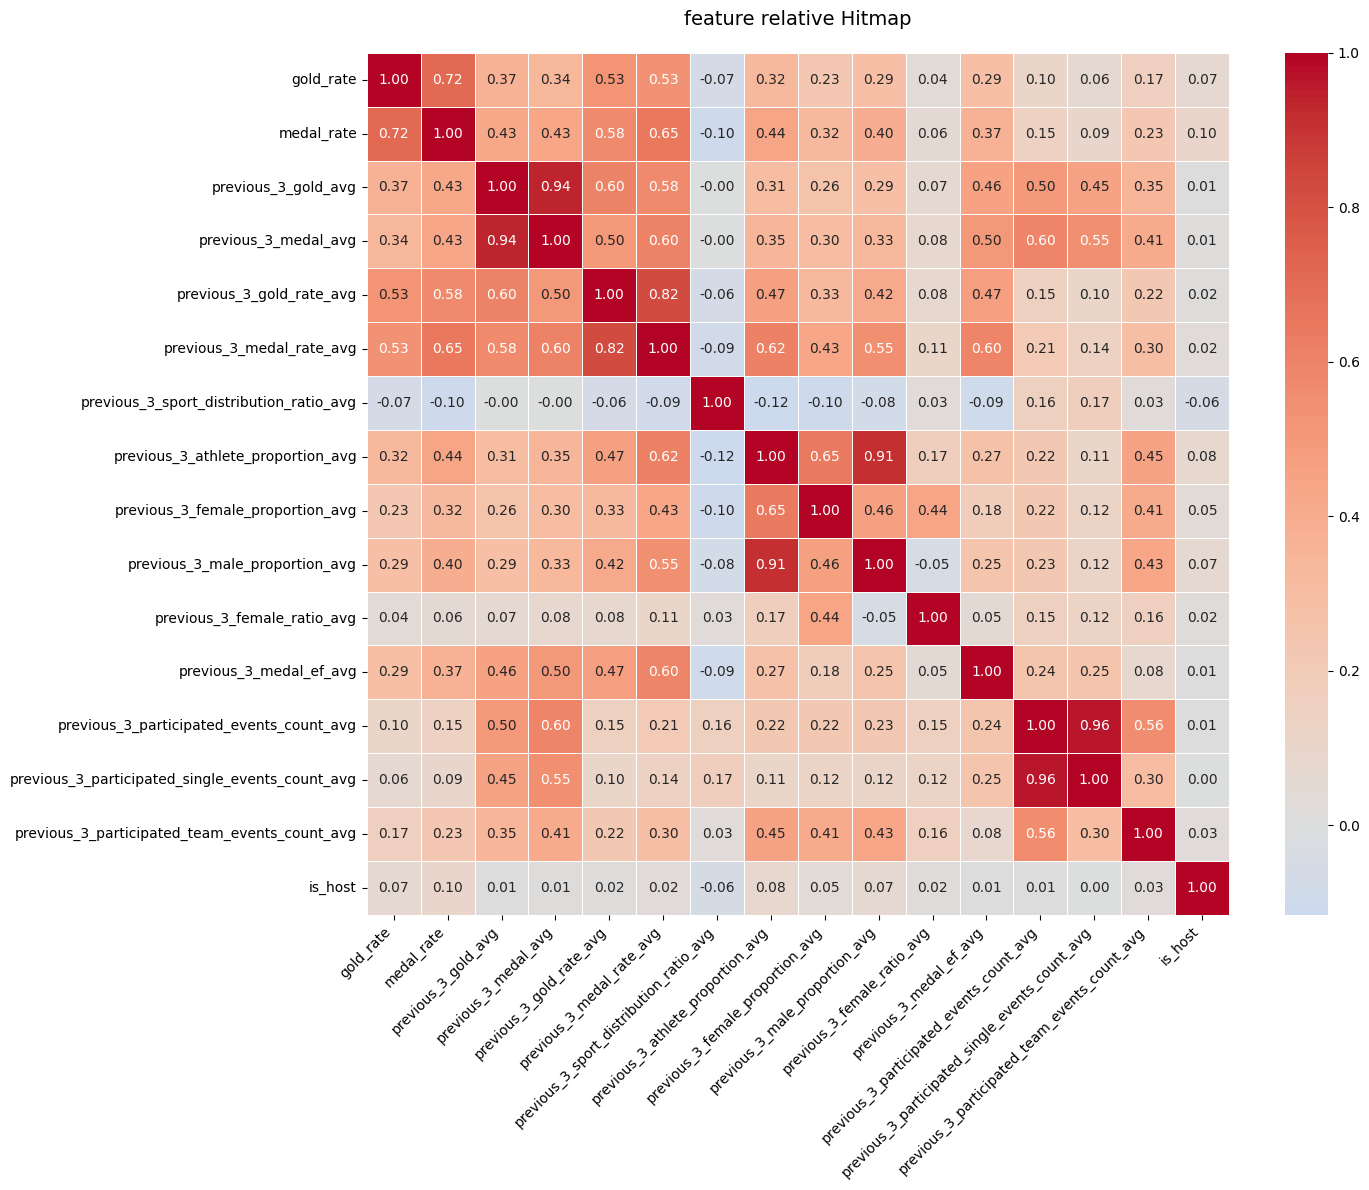

In [91]:
# 1. 准备需要分析的特征
features_to_analyze = [
    'gold_rate', 'medal_rate',
    'previous_3_gold_avg', 'previous_3_medal_avg',
    'previous_3_gold_rate_avg', 'previous_3_medal_rate_avg',
    'previous_3_sport_distribution_ratio_avg',
    'previous_3_athlete_proportion_avg',
    'previous_3_female_proportion_avg', 'previous_3_male_proportion_avg',
    'previous_3_female_ratio_avg', 'previous_3_medal_ef_avg',
    'previous_3_participated_events_count_avg',
    'previous_3_participated_single_events_count_avg',
    'previous_3_participated_team_events_count_avg',
    'is_host'
]

# 2. 创建相关性矩阵
correlation_matrix = history_sport_summary[features_to_analyze].corr()

# 3. 创建热图
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, 
            annot=True,  # 显示相关系数
            cmap='coolwarm',  # 使用红蓝色图
            center=0,  # 将0设为中心值
            fmt='.2f',  # 保留两位小数
            square=True,  # 保持方形
            linewidths=0.5)  # 添加网格线

plt.title('feature relative Hitmap', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [92]:
# 导入所需的库
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 准备泛化模型的数据
# 添加sport_count列来表示每个运动项目的样本数量
sport_counts = history_sport_summary.groupby('Sport').size()
history_sport_summary['sport_sample_count'] = history_sport_summary['Sport'].map(sport_counts)

# 2. 定义特征
general_features = [
    'previous_3_gold_rate_avg', 'previous_3_medal_rate_avg',
    'previous_3_sport_distribution_ratio_avg',
    'previous_3_athlete_proportion_avg',
    'previous_3_female_proportion_avg', 'previous_3_male_proportion_avg',
    'previous_3_female_ratio_avg', 'previous_3_medal_ef_avg',
    'previous_3_participated_events_count_avg',
    'previous_3_participated_single_events_count_avg',
    'previous_3_participated_team_events_count_avg',
    'is_host',
    'sport_sample_count'
]

# 3. 准备训练数据
X = history_sport_summary[general_features]
y_total_medal = history_sport_summary['Total_medal']
y_gold = history_sport_summary['Gold']

# 4. 分割训练集和测试集
X_train, X_test, y_train_medal, y_test_medal, y_train_gold, y_test_gold = train_test_split(
    X, y_total_medal, y_gold, test_size=0.2, random_state=42
)

# 5. 创建并训练泛化模型
general_medal_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

general_gold_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# 训练模型
general_medal_model.fit(X_train, y_train_medal)
general_gold_model.fit(X_train, y_train_gold)

# 6. 评估模型
y_pred_medal = general_medal_model.predict(X_test)
y_pred_gold = general_gold_model.predict(X_test)

# 计算整体性能
print("泛化模型性能评估：")
print("\nTotal Medal预测：")
print(f"R2 Score: {r2_score(y_test_medal, y_pred_medal):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_medal, y_pred_medal)):.4f}")
print(f"MAE: {mean_absolute_error(y_test_medal, y_pred_medal):.4f}")

print("\nGold Medal预测：")
print(f"R2 Score: {r2_score(y_test_gold, y_pred_gold):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_gold, y_pred_gold)):.4f}")
print(f"MAE: {mean_absolute_error(y_test_gold, y_pred_gold):.4f}")

# 7. 分析特征重要性
medal_feature_importance = pd.DataFrame({
    'feature': general_features,
    'importance': general_medal_model.feature_importances_
}).sort_values('importance', ascending=False)

gold_feature_importance = pd.DataFrame({
    'feature': general_features,
    'importance': general_gold_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n总奖牌数预测的特征重要性：")
print(medal_feature_importance)

print("\n金牌数预测的特征重要性：")
print(gold_feature_importance)

# 8. 保存泛化模型
general_models = {
    'medal_model': {
        'model': general_medal_model,
        'features': general_features,
        'performance': {
            'R2': r2_score(y_test_medal, y_pred_medal),
            'RMSE': np.sqrt(mean_squared_error(y_test_medal, y_pred_medal)),
            'MAE': mean_absolute_error(y_test_medal, y_pred_medal)
        },
        'feature_importance': medal_feature_importance.to_dict()
    },
    'gold_model': {
        'model': general_gold_model,
        'features': general_features,
        'performance': {
            'R2': r2_score(y_test_gold, y_pred_gold),
            'RMSE': np.sqrt(mean_squared_error(y_test_gold, y_pred_gold)),
            'MAE': mean_absolute_error(y_test_gold, y_pred_gold)
        },
        'feature_importance': gold_feature_importance.to_dict()
    }
}

# 保存模型性能结果
with open('2025_Problem_C_Data/general_model_results.txt', 'w') as f:
    f.write("泛化模型性能评估\n\n")
    f.write("Total Medal预测模型：\n")
    for metric, value in general_models['medal_model']['performance'].items():
        f.write(f"{metric}: {value:.4f}\n")
    f.write("\n特征重要性：\n")
    for idx, row in medal_feature_importance.iterrows():
        f.write(f"{row['feature']}: {row['importance']:.4f}\n")
    
    f.write("\nGold Medal预测模型：\n")
    for metric, value in general_models['gold_model']['performance'].items():
        f.write(f"{metric}: {value:.4f}\n")
    f.write("\n特征重要性：\n")
    for idx, row in gold_feature_importance.iterrows():
        f.write(f"{row['feature']}: {row['importance']:.4f}\n")

泛化模型性能评估：

Total Medal预测：
R2 Score: 0.7061
RMSE: 1.1560
MAE: 0.4740

Gold Medal预测：
R2 Score: 0.5879
RMSE: 0.5817
MAE: 0.2032

总奖牌数预测的特征重要性：
                                            feature  importance
8          previous_3_participated_events_count_avg    0.347497
0                          previous_3_gold_rate_avg    0.253759
1                         previous_3_medal_rate_avg    0.202774
5                    previous_3_male_proportion_avg    0.043464
2           previous_3_sport_distribution_ratio_avg    0.028518
9   previous_3_participated_single_events_count_avg    0.024798
7                           previous_3_medal_ef_avg    0.024676
3                 previous_3_athlete_proportion_avg    0.020833
4                  previous_3_female_proportion_avg    0.017533
6                       previous_3_female_ratio_avg    0.012223
12                               sport_sample_count    0.011798
10    previous_3_participated_team_events_count_avg    0.008635
11                          


评估 Random Forest 模型:

Total Medal预测结果:
R2 Score: 0.6995
RMSE: 1.1689
MAE: 0.4784

Gold预测结果:
R2 Score: 0.5830
RMSE: 0.5852
MAE: 0.2070

评估 Gradient Boosting 模型:

Total Medal预测结果:
R2 Score: 0.6963
RMSE: 1.1752
MAE: 0.4820

Gold预测结果:
R2 Score: 0.5867
RMSE: 0.5826
MAE: 0.2062

评估 ElasticNet 模型:

Total Medal预测结果:
R2 Score: 0.2949
RMSE: 1.7907
MAE: 0.7269

Gold预测结果:
R2 Score: 0.1743
RMSE: 0.8234
MAE: 0.3001

评估 XGBoost 模型:

Total Medal预测结果:
R2 Score: 0.6840
RMSE: 1.1988
MAE: 0.4796

Gold预测结果:
R2 Score: 0.5499
RMSE: 0.6079
MAE: 0.2086

评估 LightGBM 模型:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2349
[LightGBM] [Info] Number of data points in the train set: 16980, number of used features: 13
[LightGBM] [Info] Start training from score 0.598704

Total Medal预测结果:
R2 Score: 0.6656
RMSE: 1.2332
MAE: 0.4885
[LightGBM] [Info] Auto-choosing col-wise multi

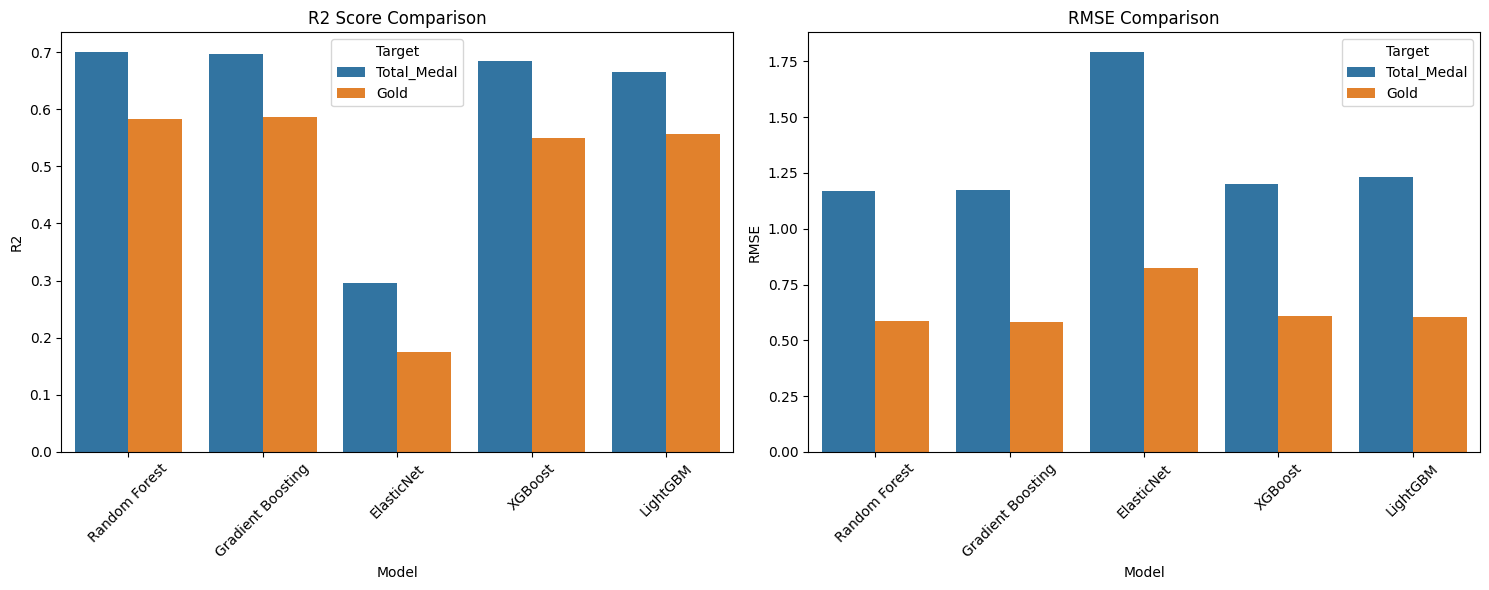

In [93]:
# 导入所需的库
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 定义要测试的所有模型
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'XGBoost': XGBRegressor(
        n_estimators=100, 
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    ),
    'LightGBM': LGBMRegressor(
        n_estimators=100,
        learning_rate=0.1,
        num_leaves=31,
        random_state=42
    )
}

# 准备数据
X = history_sport_summary[general_features]
y_total_medal = history_sport_summary['Total_medal']
y_gold = history_sport_summary['Gold']

# 分割数据
X_train, X_test, y_train_medal, y_test_medal, y_train_gold, y_test_gold = train_test_split(
    X, y_total_medal, y_gold, test_size=0.2, random_state=42
)

# 存储结果
results = {
    'Total_Medal': {},
    'Gold': {}
}

# 创建存储性能结果的列表
performance_records = []

# 训练和评估每个模型
for name, model in models.items():
    print(f"\n评估 {name} 模型:")
    
    try:
        # Total Medal预测
        model.fit(X_train, y_train_medal)
        y_pred_medal = model.predict(X_test)
        
        results['Total_Medal'][name] = {
            'R2': r2_score(y_test_medal, y_pred_medal),
            'RMSE': np.sqrt(mean_squared_error(y_test_medal, y_pred_medal)),
            'MAE': mean_absolute_error(y_test_medal, y_pred_medal)
        }
        
        # 添加Total Medal结果到记录
        performance_records.append({
            'Model': name,
            'Target': 'Total_Medal',
            'R2': results['Total_Medal'][name]['R2'],
            'RMSE': results['Total_Medal'][name]['RMSE'],
            'MAE': results['Total_Medal'][name]['MAE']
        })
        
        print(f"\nTotal Medal预测结果:")
        print(f"R2 Score: {results['Total_Medal'][name]['R2']:.4f}")
        print(f"RMSE: {results['Total_Medal'][name]['RMSE']:.4f}")
        print(f"MAE: {results['Total_Medal'][name]['MAE']:.4f}")
        
        # Gold预测
        model.fit(X_train, y_train_gold)
        y_pred_gold = model.predict(X_test)
        
        results['Gold'][name] = {
            'R2': r2_score(y_test_gold, y_pred_gold),
            'RMSE': np.sqrt(mean_squared_error(y_test_gold, y_pred_gold)),
            'MAE': mean_absolute_error(y_test_gold, y_pred_gold)
        }
        
        # 添加Gold结果到记录
        performance_records.append({
            'Model': name,
            'Target': 'Gold',
            'R2': results['Gold'][name]['R2'],
            'RMSE': results['Gold'][name]['RMSE'],
            'MAE': results['Gold'][name]['MAE']
        })
        
        print(f"\nGold预测结果:")
        print(f"R2 Score: {results['Gold'][name]['R2']:.4f}")
        print(f"RMSE: {results['Gold'][name]['RMSE']:.4f}")
        print(f"MAE: {results['Gold'][name]['MAE']:.4f}")
        
    except Exception as e:
        print(f"Error in {name} model: {str(e)}")
        continue

# 创建性能比较表格
performance_df = pd.DataFrame(performance_records)

# 显示性能比较表格
print("\n模型性能比较：")
print(performance_df.sort_values(['Target', 'R2'], ascending=[True, False]))

# 可视化比较
plt.figure(figsize=(15, 6))

# R2 Score比较
plt.subplot(1, 2, 1)
sns.barplot(data=performance_df, x='Model', y='R2', hue='Target')
plt.title('R2 Score Comparison')
plt.xticks(rotation=45)

# RMSE比较
plt.subplot(1, 2, 2)
sns.barplot(data=performance_df, x='Model', y='RMSE', hue='Target')
plt.title('RMSE Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 保存结果
performance_df.to_csv('2025_Problem_C_Data/model_comparison_results.csv', index=False)

## 针对国家奖牌预测模型的建立

我们发现针对sport项目进行奖牌和金牌数量的预测效果有限

所以我们决定尝试一下针对国家进行奖牌数量的预测

In [94]:
history_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,athlete_count,female_count,male_count,...,previous_3_total_participants_avg,previous_3_total_female_ participants_avg,previous_3_total_male_participants_avg,previous_3_single_event_count_avg,previous_3_team_events_count_avg,previous_3_event_count_avg,previous_3_participated_events_count_avg,previous_3_participated_single_events_count_avg,previous_3_participated_team_events_count_avg,sport_sample_count
0,AIN,2024,Canoe Sprint,0,0,0,0,6,2,4,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,100
1,AIN,2024,Cycling Road,0,0,0,0,7,5,2,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,132
2,AIN,2024,Rowing,0,1,0,1,2,1,1,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,730
3,AIN,2024,Shooting,0,0,0,0,2,2,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1284
4,AIN,2024,Swimming,0,0,0,0,7,4,3,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2008,Tennis,0,0,0,0,1,1,0,...,248.666667,124.666667,124.0,2.0,2.0,4.0,2.333333,1.333333,1.0,477
25954,Zimbabwe,2000,Triathlon,0,0,0,0,1,0,1,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,260
25955,Zimbabwe,2008,Triathlon,0,0,0,0,1,0,1,...,100.000000,48.000000,52.0,2.0,0.0,2.0,1.000000,1.000000,0.0,260
25956,Zimbabwe,2012,Triathlon,0,0,0,0,1,0,1,...,105.000000,51.500000,53.5,2.0,0.0,2.0,1.000000,1.000000,0.0,260


In [95]:
medal_data =medal_data[medal_data['Year'] >1960] 

In [96]:
medal_data

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Year_Gold_Total,Year_Total_Medals,Gold_Percentage,Total_Percentage,is_host
386,1,United States,36,26,28,90,1964,163,504,22.09,17.86,0
387,2,Soviet Union,30,31,35,96,1964,163,504,18.40,19.05,0
388,3,Japan,16,5,8,29,1964,163,504,9.82,5.75,1
389,4,United Team of Germany,10,22,18,50,1964,163,504,6.13,9.92,0
390,5,Italy,10,10,7,27,1964,163,504,6.13,5.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,84,Qatar,0,0,1,1,2024,328,1039,0.00,0.10,0
1431,84,Refugee Olympic Team,0,0,1,1,2024,328,1039,0.00,0.10,0
1432,84,Singapore,0,0,1,1,2024,328,1039,0.00,0.10,0
1433,84,Slovakia,0,0,1,1,2024,328,1039,0.00,0.10,0


In [97]:
# 按国家和年份聚合数据
history_year_summary = history_sport_summary.groupby(['Country', 'Year']).agg({
    'Gold': 'sum',
    'Total_medal': 'sum',
    'athlete_count': 'sum',
    'female_count': 'sum',
    'male_count': 'sum',
    'participated_events_count': 'sum',
    'participated_single_events_count': 'sum',
    'participated_team_events_count': 'sum',
    'event_count': 'sum',
    'single_event_count': 'sum',
    'team_events_count': 'sum',
    'is_host': 'max'  # 使用max因为is_host在同一年同一国家应该是相同的
}).reset_index()



In [98]:
history_year_summary

,Country,Year,Gold,Total_medal,athlete_count,female_count,male_count,participated_events_count,participated_single_events_count,participated_team_events_count,event_count,single_event_count,team_events_count,is_host
0,AIN,2024,1,5,46,25,21,30.0,24.0,6,122,89.0,33.0,0
1,Afghanistan,1964,0,0,8,0,8,8.0,8.0,0,16,16.0,0.0,0
2,Afghanistan,1968,0,0,5,0,5,5.0,5.0,0,16,16.0,0.0,0
3,Afghanistan,1972,0,0,8,0,8,8.0,8.0,0,20,20.0,0.0,0
4,Afghanistan,1980,0,0,11,0,11,11.0,11.0,0,31,31.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,Zimbabwe,2008,1,4,16,8,8,15.0,15.0,0,119,89.0,30.0,0
2569,Zimbabwe,2012,0,0,9,5,4,8.0,8.0,0,97,72.0,25.0,0
2570,Zimbabwe,2016,0,0,31,22,9,13.0,12.0,1,122,90.0,32.0,0
2571,Zimbabwe,2020,0,0,5,1,4,5.0,5.0,0,104,75.0,29.0,0



评估 Random Forest 模型:

金牌预测结果:
R2: 0.9927
RMSE: 0.4132
MAE: 0.1055

总奖牌预测结果:
R2: 0.9875
RMSE: 1.4884
MAE: 0.3577

特征重要性（前5个）:
             feature  importance
11  prev_3_medal_avg    0.393868
0      athlete_count    0.318163
7    medal_per_event    0.147552
10   prev_3_gold_avg    0.061701
8     gold_per_event    0.020606

评估 Gradient Boosting 模型:

金牌预测结果:
R2: 0.9910
RMSE: 0.4601
MAE: 0.1005

总奖牌预测结果:
R2: 0.9870
RMSE: 1.5194
MAE: 0.3782

特征重要性（前5个）:
                             feature  importance
11                  prev_3_medal_avg    0.388663
0                      athlete_count    0.338727
7                    medal_per_event    0.175372
3          participated_events_count    0.047198
4   participated_single_events_count    0.022667


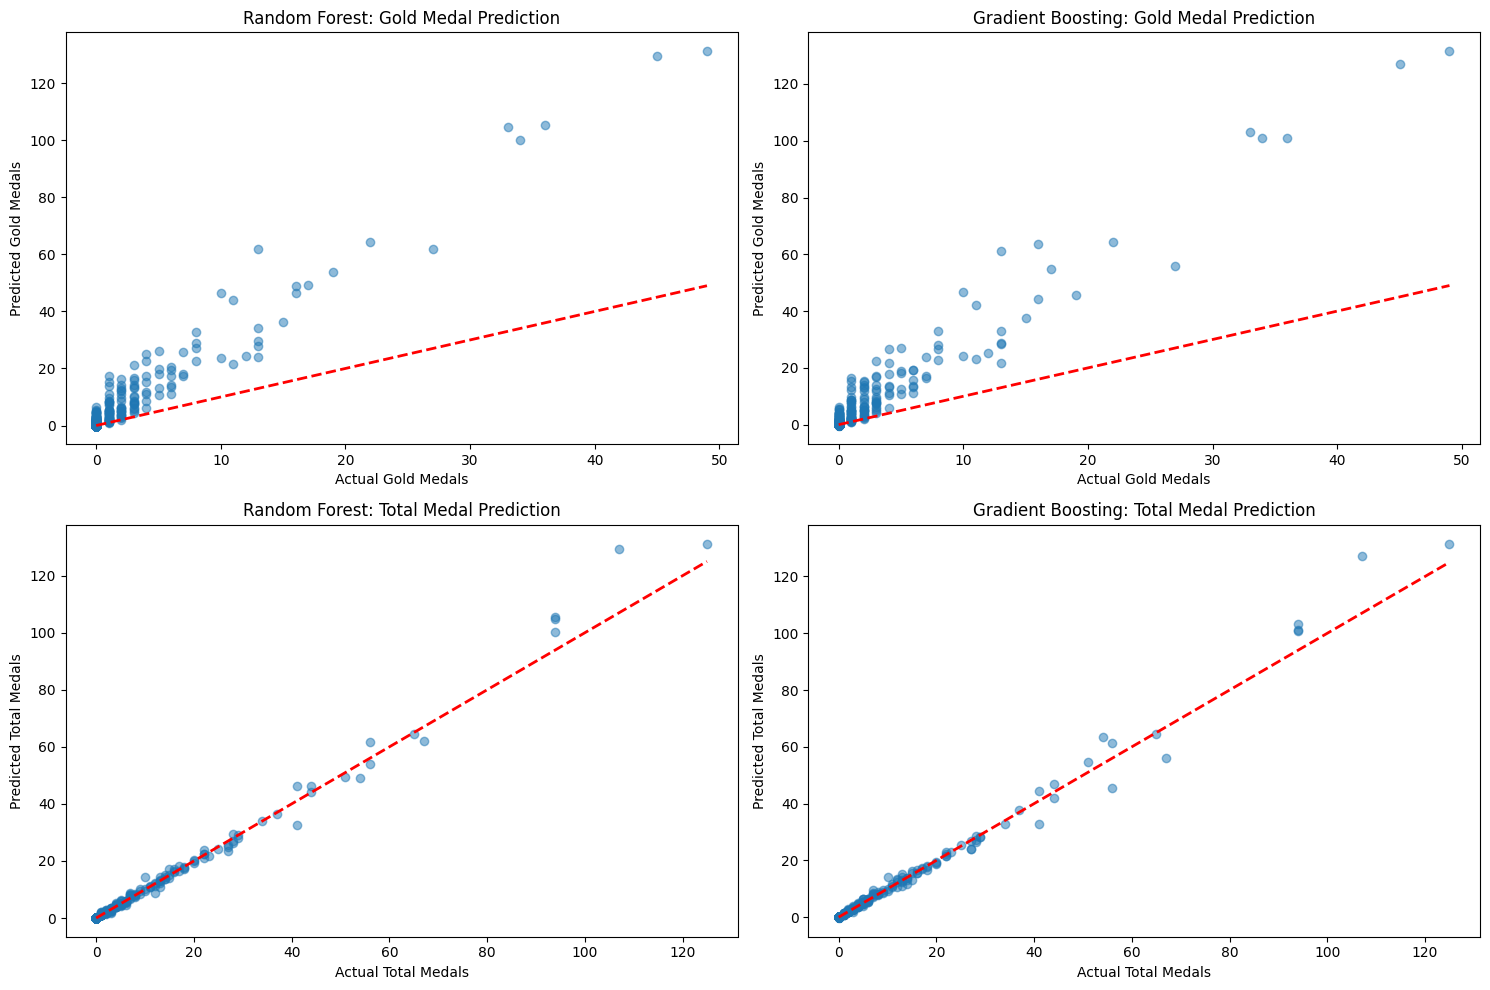

In [99]:
# 导入所需的库
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# 准备基础特征
base_features = [
    'athlete_count', 'female_count', 'male_count',
    'participated_events_count', 'participated_single_events_count',
    'participated_team_events_count', 'is_host'
]

def prepare_data(df):
    df = df.copy()
    
    # 计算比率特征
    df['medal_per_event'] = (df['Total_medal'] / df['participated_events_count']).fillna(0)
    df['gold_per_event'] = (df['Gold'] / df['participated_events_count']).fillna(0)
    df['female_ratio'] = (df['female_count'] / df['athlete_count']).fillna(0)
    
    return df

def add_historical_features(df):
    df = df.copy()
    result_df = pd.DataFrame()
    
    # 对每个国家分别处理
    for country in df['Country'].unique():
        country_data = df[df['Country'] == country].sort_values('Year')
        
        # 计算历史平均值
        country_data['prev_3_gold_avg'] = country_data['Gold'].rolling(window=3, min_periods=1).mean().shift()
        country_data['prev_3_medal_avg'] = country_data['Total_medal'].rolling(window=3, min_periods=1).mean().shift()
        country_data['prev_3_gold_per_event_avg'] = country_data['gold_per_event'].rolling(window=3, min_periods=1).mean().shift()
        country_data['prev_3_medal_per_event_avg'] = country_data['medal_per_event'].rolling(window=3, min_periods=1).mean().shift()
        
        result_df = pd.concat([result_df, country_data])
    
    # 填充缺失值
    historical_features = ['prev_3_gold_avg', 'prev_3_medal_avg', 
                         'prev_3_gold_per_event_avg', 'prev_3_medal_per_event_avg']
    result_df[historical_features] = result_df[historical_features].fillna(0)
    
    return result_df

# 准备数据
history_year_summary = prepare_data(history_year_summary)
history_year_summary = add_historical_features(history_year_summary)

# 更新特征列表
features = base_features + [
    'medal_per_event', 'gold_per_event', 'female_ratio',
    'prev_3_gold_avg', 'prev_3_medal_avg',
    'prev_3_gold_per_event_avg', 'prev_3_medal_per_event_avg'
]

# 准备模型数据
X = history_year_summary[features]
y_gold =history_year_summary['Gold']
y_medal = history_year_summary['Total_medal']

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割数据
X_train, X_test, y_train_gold, y_test_gold, y_train_medal, y_test_medal = train_test_split(
    X_scaled, y_gold, y_medal, test_size=0.2, random_state=42
)

# 定义模型
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
}

# 训练和评估模型
results = {}
for name, model in models.items():
    print(f"\n评估 {name} 模型:")
    
    # 金牌预测
    model.fit(X_train, y_train_gold)
    y_pred_gold = model.predict(X_test)
    
    gold_metrics = {
        'R2': r2_score(y_test_gold, y_pred_gold),
        'RMSE': np.sqrt(mean_squared_error(y_test_gold, y_pred_gold)),
        'MAE': mean_absolute_error(y_test_gold, y_pred_gold)
    }
    
    print("\n金牌预测结果:")
    for metric, value in gold_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # 总奖牌预测
    model.fit(X_train, y_train_medal)
    y_pred_medal = model.predict(X_test)
    
    medal_metrics = {
        'R2': r2_score(y_test_medal, y_pred_medal),
        'RMSE': np.sqrt(mean_squared_error(y_test_medal, y_pred_medal)),
        'MAE': mean_absolute_error(y_test_medal, y_pred_medal)
    }
    
    print("\n总奖牌预测结果:")
    for metric, value in medal_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # 特征重要性分析
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\n特征重要性（前5个）:")
    print(feature_importance.head())
    
    results[name] = {
        'gold_metrics': gold_metrics,
        'medal_metrics': medal_metrics,
        'feature_importance': feature_importance
    }

# 可视化预测结果
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    # 金牌预测
    plt.subplot(2, 2, i)
    plt.scatter(y_test_gold, model.predict(X_test), alpha=0.5)
    plt.plot([y_test_gold.min(), y_test_gold.max()], 
             [y_test_gold.min(), y_test_gold.max()], 'r--', lw=2)
    plt.xlabel('Actual Gold Medals')
    plt.ylabel('Predicted Gold Medals')
    plt.title(f'{name}: Gold Medal Prediction')
    
    # 总奖牌预测
    plt.subplot(2, 2, i+2)
    plt.scatter(y_test_medal, model.predict(X_test), alpha=0.5)
    plt.plot([y_test_medal.min(), y_test_medal.max()], 
             [y_test_medal.min(), y_test_medal.max()], 'r--', lw=2)
    plt.xlabel('Actual Total Medals')
    plt.ylabel('Predicted Total Medals')
    plt.title(f'{name}: Total Medal Prediction')

plt.tight_layout()
plt.show()


评估 Random Forest 模型:

金牌预测结果:
R2: 0.7344
RMSE: 2.4987
MAE: 0.8694

总奖牌预测结果:
R2: 0.8318
RMSE: 5.4595
MAE: 2.0742

特征重要性（前10个）:
                                      feature  importance
11                     prev_3_Total_medal_avg    0.790135
10                            prev_3_Gold_avg    0.090939
1                  prev_3_medal_per_event_avg    0.030909
5                     prev_3_female_count_avg    0.019925
2                   prev_3_gold_per_event_avg    0.015386
4                    prev_3_athlete_count_avg    0.011587
3                     prev_3_female_ratio_avg    0.009136
6                       prev_3_male_count_avg    0.007646
9   prev_3_participated_team_events_count_avg    0.007329
0                                     is_host    0.005828

评估 Gradient Boosting 模型:

金牌预测结果:
R2: 0.4514
RMSE: 3.5914
MAE: 1.0425

总奖牌预测结果:
R2: 0.7632
RMSE: 6.4781
MAE: 2.2813

特征重要性（前10个）:
                                      feature  importance
11                     prev_3_Total_medal_avg 

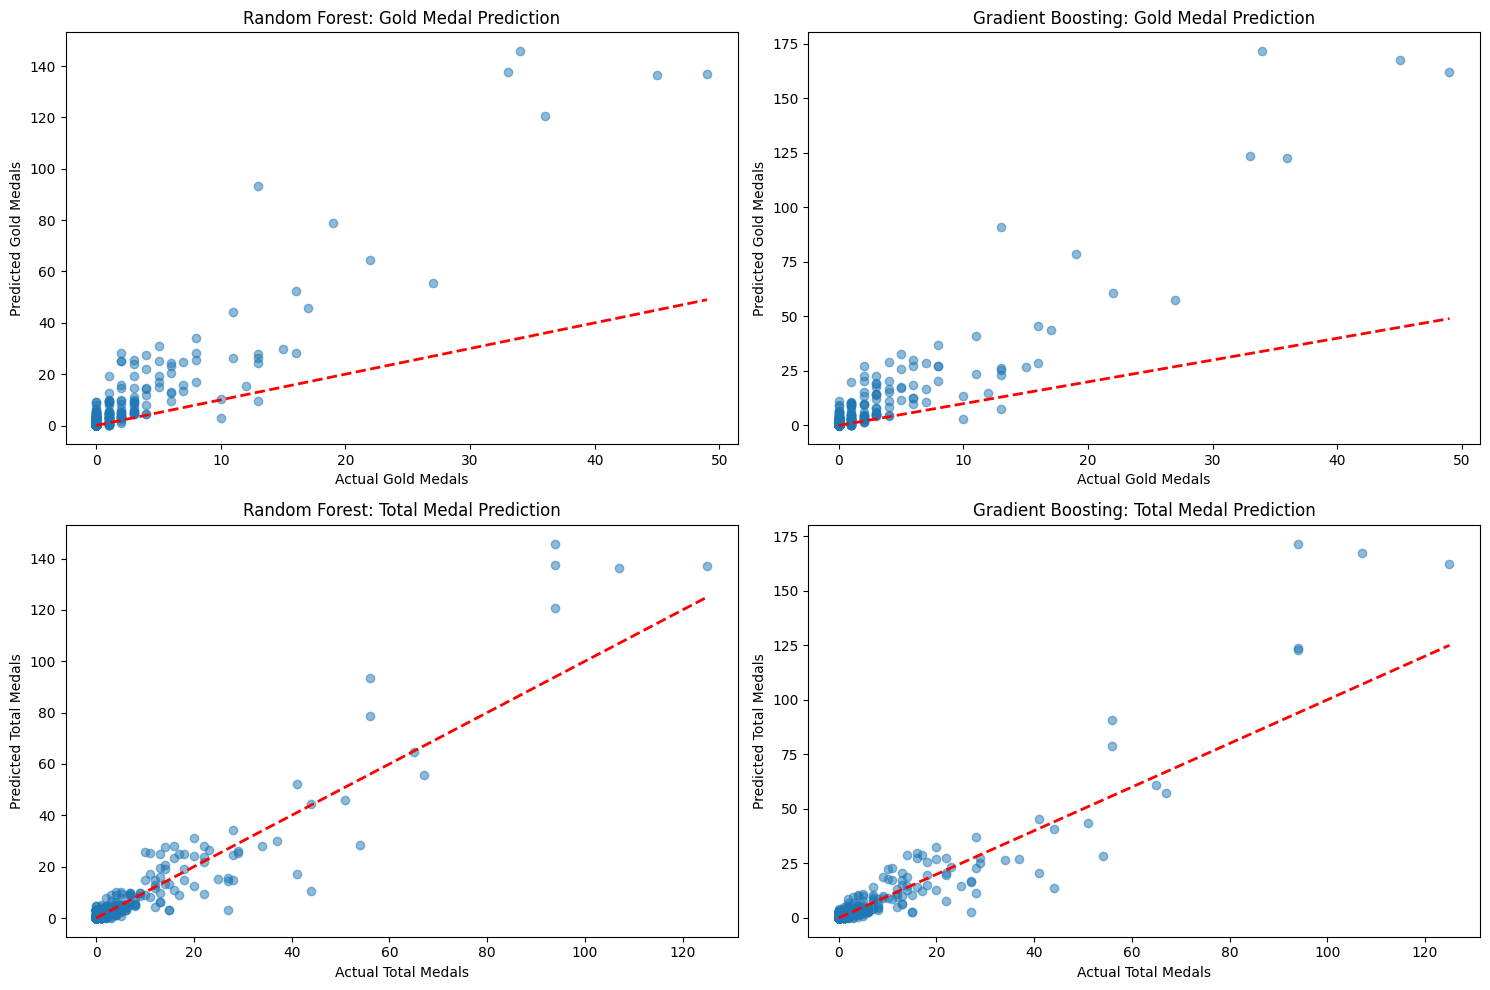

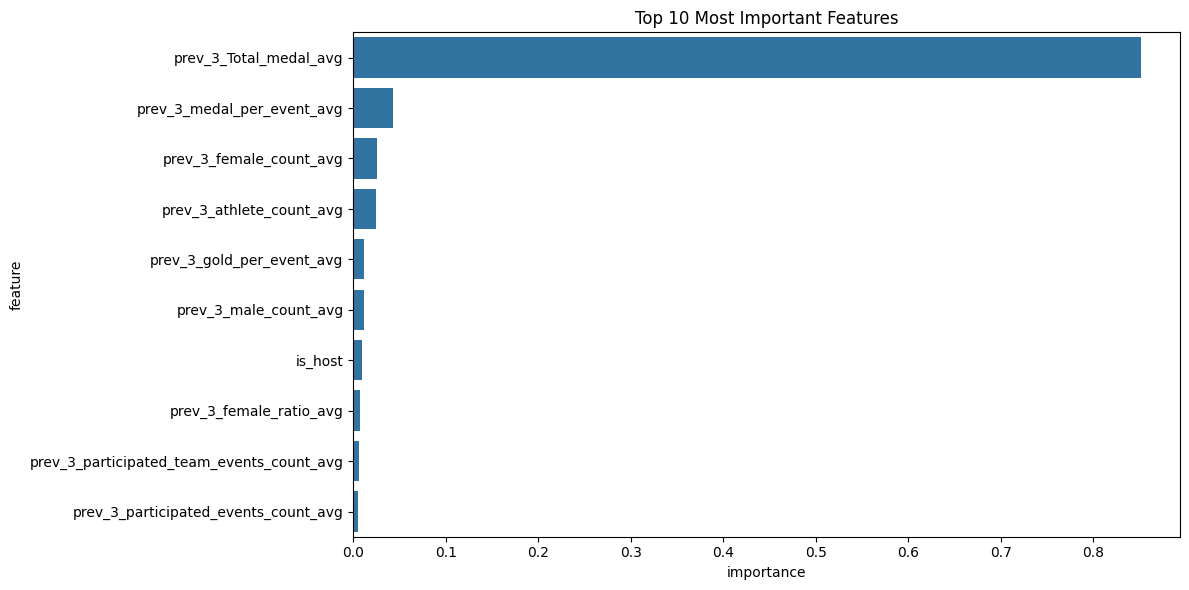

In [100]:
# 导入所需的库
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

def prepare_data(df):
    df = df.copy()
    
    # 计算比率特征
    df['medal_per_event'] = (df['Total_medal'] / df['participated_events_count']).fillna(0)
    df['gold_per_event'] = (df['Gold'] / df['participated_events_count']).fillna(0)
    df['female_ratio'] = (df['female_count'] / df['athlete_count']).fillna(0)
    
    return df

def add_historical_features(df):
    df = df.copy()
    result_df = pd.DataFrame()
    
    # 需要计算历史平均的特征
    features_to_track = [
        'medal_per_event', 'gold_per_event', 'female_ratio',
        'athlete_count', 'female_count', 'male_count',
        'participated_events_count', 'participated_single_events_count',
        'participated_team_events_count',
        'Gold', 'Total_medal'
    ]
    
    # 对每个国家分别处理
    for country in df['Country'].unique():
        country_data = df[df['Country'] == country].sort_values('Year')
        
        # 为每个特征计算历史平均值
        for feature in features_to_track:
            col_name = f'prev_3_{feature}_avg'
            country_data[col_name] = country_data[feature].rolling(window=3, min_periods=1).mean().shift()
        
        result_df = pd.concat([result_df, country_data])
    
    # 填充缺失值4
    historical_features = [f'prev_3_{feature}_avg' for feature in features_to_track]
    result_df[historical_features] = result_df[historical_features].fillna(0)
    
    return result_df

# 准备数据
history_year_summary = prepare_data(history_year_summary)
history_year_summary = add_historical_features(history_year_summary)

# 定义特征列表
# base_features = [
#     'athlete_count', 'female_count', 'male_count',
#     'participated_events_count', 'participated_single_events_count',
#     'participated_team_events_count', 'is_host',
#     'medal_per_event', 'gold_per_event', 'female_ratio'
# ]

base_features = ['is_host']

historical_features = [
    'prev_3_medal_per_event_avg', 'prev_3_gold_per_event_avg', 
    'prev_3_female_ratio_avg', 'prev_3_athlete_count_avg',
    'prev_3_female_count_avg', 'prev_3_male_count_avg',
    'prev_3_participated_events_count_avg',
    'prev_3_participated_single_events_count_avg',
    'prev_3_participated_team_events_count_avg',
    'prev_3_Gold_avg', 'prev_3_Total_medal_avg'
]

features = base_features + historical_features

# 准备模型数据
X = history_year_summary[features]
y_gold = history_year_summary['Gold']
y_medal = history_year_summary['Total_medal']

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割数据
X_train, X_test, y_train_gold, y_test_gold, y_train_medal, y_test_medal = train_test_split(
    X_scaled, y_gold, y_medal, test_size=0.2, random_state=42
)

# 定义模型
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
}

# 训练和评估模型
results = {}
for name, model in models.items():
    print(f"\n评估 {name} 模型:")
    
    # 金牌预测
    model.fit(X_train, y_train_gold)
    y_pred_gold = model.predict(X_test)
    
    gold_metrics = {
        'R2': r2_score(y_test_gold, y_pred_gold),
        'RMSE': np.sqrt(mean_squared_error(y_test_gold, y_pred_gold)),
        'MAE': mean_absolute_error(y_test_gold, y_pred_gold)
    }
    
    print("\n金牌预测结果:")
    for metric, value in gold_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # 总奖牌预测
    model.fit(X_train, y_train_medal)
    y_pred_medal = model.predict(X_test)
    
    medal_metrics = {
        'R2': r2_score(y_test_medal, y_pred_medal),
        'RMSE': np.sqrt(mean_squared_error(y_test_medal, y_pred_medal)),
        'MAE': mean_absolute_error(y_test_medal, y_pred_medal)
    }
    
    print("\n总奖牌预测结果:")
    for metric, value in medal_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # 特征重要性分析
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\n特征重要性（前10个）:")
    print(feature_importance.head(10))
    
    results[name] = {
        'gold_metrics': gold_metrics,
        'medal_metrics': medal_metrics,
        'feature_importance': feature_importance
    }

# 可视化预测结果
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    # 金牌预测
    plt.subplot(2, 2, i)
    plt.scatter(y_test_gold, model.predict(X_test), alpha=0.5)
    plt.plot([y_test_gold.min(), y_test_gold.max()], 
             [y_test_gold.min(), y_test_gold.max()], 'r--', lw=2)
    plt.xlabel('Actual Gold Medals')
    plt.ylabel('Predicted Gold Medals')
    plt.title(f'{name}: Gold Medal Prediction')
    
    # 总奖牌预测
    plt.subplot(2, 2, i+2)
    plt.scatter(y_test_medal, model.predict(X_test), alpha=0.5)
    plt.plot([y_test_medal.min(), y_test_medal.max()], 
             [y_test_medal.min(), y_test_medal.max()], 'r--', lw=2)
    plt.xlabel('Actual Total Medals')
    plt.ylabel('Predicted Total Medals')
    plt.title(f'{name}: Total Medal Prediction')

plt.tight_layout()
plt.show()

# 保存特征重要性分析
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

In [101]:
history_year_summary.to_csv('history_year_summary.csv',index = False)

In [103]:
# 首先定义所有需要的函数和变量
features_to_track = [
    'medal_per_event', 'gold_per_event', 'female_ratio',
    'athlete_count', 'female_count', 'male_count',
    'participated_events_count', 'participated_single_events_count',
    'participated_team_events_count',
    'Gold', 'Total_medal'
]

def prepare_2028_prediction_data(df):
    df = df.copy()
    
    # 获取2024年的数据作为基础
    data_2024 = df[df['Year'] == 2024].copy()
    
    # 修改年份为2028
    data_2024['Year'] = 2028
    
    # 计算2028年的历史特征
    prediction_data = pd.DataFrame()
    
    for country in data_2024['Country'].unique():
        country_history = df[df['Country'] == country].sort_values('Year')
        country_2028 = data_2024[data_2024['Country'] == country].copy()
        
        # 计算历史平均值（使用2024及之前的最近3届）
        for feature in features_to_track:
            col_name = f'prev_3_{feature}_avg'
            # 使用2024年的数据作为参考
            if feature in ['Gold', 'Total_medal']:
                last_value = country_history[feature].iloc[-1]  # 2024年的值
                country_2028[col_name] = last_value
            else:
                last_3_years = country_history[feature].tail(3).mean()
                country_2028[col_name] = last_3_years
        
        prediction_data = pd.concat([prediction_data, country_2028])
    
    # 准备预测特征
    X_pred = prediction_data[features]
    X_pred_scaled = scaler.transform(X_pred)
    
    return prediction_data, X_pred_scaled

# 准备2028年预测数据
prediction_data_2028, X_pred_2028 = prepare_2028_prediction_data(history_year_summary)

# 使用训练好的模型进行预测
predictions_2028 = {}
for name, model in models.items():
    # 分别训练金牌和总奖牌模型
    model_gold = RandomForestRegressor(
        n_estimators=100,
        max_depth=8,
        min_samples_split=5,
        random_state=42
    ).fit(X_scaled, y_gold)
    
    model_medal = RandomForestRegressor(
        n_estimators=100,
        max_depth=8,
        min_samples_split=5,
        random_state=42
    ).fit(X_scaled, y_medal)
    
    # 预测2028年的结果
    gold_pred = model_gold.predict(X_pred_2028)
    medal_pred = model_medal.predict(X_pred_2028)
    
    # 基于2024年的数据进行调整
    gold_pred = np.clip(gold_pred, 0, 100)  # 限制金牌最大值为100
    medal_pred = np.clip(medal_pred, 0, 350)  # 限制总奖牌最大值为350
    
    # 确保总奖牌数大于等于金牌数
    medal_pred = np.maximum(medal_pred, gold_pred * 2)  # 总奖牌数至少是金牌数的2倍
    
    predictions_2028[name] = {
        'Gold': gold_pred,
        'Total_medal': medal_pred
    }

# 整合预测结果
final_predictions = pd.DataFrame()
for name in models.keys():
    model_predictions = pd.DataFrame({
        'Country': prediction_data_2028['Country'],
        f'Predicted_Gold_{name}': predictions_2028[name]['Gold'],
        f'Predicted_Total_{name}': predictions_2028[name]['Total_medal']
    })
    
    if final_predictions.empty:
        final_predictions = model_predictions
    else:
        final_predictions = final_predictions.merge(model_predictions, on='Country')

# 计算平均预测值并基于2024年数据进行调整
final_predictions['Predicted_Gold'] = final_predictions[[col for col in final_predictions.columns if 'Predicted_Gold' in col]].mean(axis=1)
final_predictions['Predicted_Total'] = final_predictions[[col for col in final_predictions.columns if 'Predicted_Total' in col]].mean(axis=1)

# 获取2024年的数据作为参考
data_2024 = history_year_summary[history_year_summary['Year'] == 2024][['Country', 'Gold', 'Total_medal']]

# 调整预测值
final_predictions = final_predictions.merge(data_2024, on='Country', how='left')
final_predictions['Predicted_Gold'] = final_predictions.apply(
    lambda row: min(max(0, round(row['Predicted_Gold'])), row['Gold'] * 1.2), axis=1
)
final_predictions['Predicted_Total'] = final_predictions.apply(
    lambda row: max(row['Predicted_Total'], row['Total_medal'] * 0.8), axis=1
)

# 确保总金牌数在合理范围内（约350枚）
total_gold = final_predictions['Predicted_Gold'].sum()
if total_gold > 350:
    scale_factor = 350 / total_gold
    final_predictions['Predicted_Gold'] = (final_predictions['Predicted_Gold'] * scale_factor).round()
    final_predictions['Predicted_Total'] = (final_predictions['Predicted_Total'] * scale_factor).round()

# 按预测金牌数排序
final_predictions_sorted = final_predictions.sort_values('Predicted_Gold', ascending=False)

# 显示前20个国家的预测结果
print("\n2028年奥运会预测结果（前20名）：")
print(final_predictions_sorted[['Country', 'Predicted_Gold', 'Predicted_Total']].head(20))

# 输出预测的统计信息
print("\n预测统计信息：")
print(f"预测的总金牌数：{final_predictions['Predicted_Gold'].sum()}")
print(f"预测的总奖牌数：{final_predictions['Predicted_Total'].sum()}")
print(f"参与预测的国家数量：{len(final_predictions)}")

# 与2024年的结果比较
print("\n与2024年比较：")
comparison = final_predictions_sorted[['Country', 'Predicted_Gold', 'Predicted_Total', 'Gold', 'Total_medal']].head(20)
comparison['Gold_Change'] = comparison['Predicted_Gold'] - comparison['Gold']
comparison['Total_Change'] = comparison['Predicted_Total'] - comparison['Total_medal']
print(comparison)


2028年奥运会预测结果（前20名）：
         Country  Predicted_Gold  Predicted_Total
39         China            39.0        95.901900
190          USA            39.0       112.984730
11     Australia            19.0        53.617879
89         Japan            18.0        56.450159
189           UK            15.6        62.258421
63        France            15.0        58.283877
86         Italy            14.4        46.688033
127  Netherlands            14.0        38.094434
67       Germany            10.0        30.828128
33        Canada             9.0        30.179560
167  South Korea             9.0        25.600000
128  New Zealand             9.0        22.301472
78       Hungary             6.0        16.972278
169        Spain             6.0        22.043131
26        Brazil             3.6        24.837397
18       Belgium             3.0         9.430324
195   Uzbekistan             3.0        10.917992
174       Sweden             3.0        10.256965
192      Ukraine             

### 保存结果

In [108]:
# 创建一个更完整的预测结果DataFrame
prediction_results = final_predictions_sorted.copy()

# 重命名2024年的列
prediction_results = prediction_results.rename(columns={
    'Gold': '2024_Gold',
    'Total_medal': '2024_Total_medal'
})

# 添加排名列
prediction_results['Rank'] = range(1, len(prediction_results) + 1)

# 重新组织列的顺序
columns_order = [
    'Rank',
    'Country',
    'Predicted_Gold',
    'Predicted_Total',
    '2024_Gold',  # 2024年的金牌数
    '2024_Total_medal',  # 2024年的总奖牌数
]

# 保存完整的预测结果
prediction_results[columns_order].to_csv(
    'predictions_2028_full.csv', 
    index=False
)




### 查看之前没有拿过奖牌的国家

In [109]:
# 找出历史上从未获得过奖牌的国家
never_medal_countries = history_year_summary.groupby('Country').agg({
    'Total_medal': 'sum',
    'Gold': 'sum'
}).reset_index()

# 从未获得过任何奖牌的国家
no_medal_countries = never_medal_countries[never_medal_countries['Total_medal'] == 0]



In [112]:
no_medal_countries

,Country,Total_medal,Gold
4,American Samoa,0,0
5,Andorra,0,0
6,Angola,0,0
7,Antigua,0,0
10,Aruba,0,0
...,...,...,...
187,Timor-Leste,0,0
194,Tuvalu,0,0
202,Vanuatu,0,0
205,"Virgin Islands, British",0,0


In [118]:
# 从未获得过奖牌的国家的预测情况
no_medal_predictions = prediction_results[
    prediction_results['Country'].isin(no_medal_countries['Country'])
][['Rank', 'Country', 'Predicted_Gold', 'Predicted_Total', '2024_Gold', '2024_Total_medal']].copy()



In [116]:
no_medal_predictions.to_csv('no_medal_predictions.csv',index = False)